In [187]:
import sys  
sys.path.insert(1, '..')

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
projectsWithBD = 234

This script analyse this association rules find in the last version

In [189]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv10.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit10_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

antecedents  \
0                    frozenset({'Firebird'})   
1                      frozenset({'Ingres'})   
2                    frozenset({'Informix'})   
3         frozenset({'SAP Adaptive Server'})   
4                   frozenset({'MS Access'})   
5                    frozenset({'Informix'})   
6                    frozenset({'Informix'})   
7                    frozenset({'Firebird'})   
8                    frozenset({'Informix'})   
9                    frozenset({'Teradata'})   
10                   frozenset({'Firebird'})   
11        frozenset({'SAP Adaptive Server'})   
12                    frozenset({'SapHana'})   
13                   frozenset({'Informix'})   
14                  frozenset({'Cassandra'})   
15                  frozenset({'Influx DB'})   
16                  frozenset({'Hazelcast'})   
17   frozenset({'Microsoft Azure CosmosDB'})   
18                    frozenset({'IBM DB2'})   
19                    frozenset({'IBM DB2'})   
20        frozenset({'SAP Adaptive Server'})   
21                   frozenset({'Firebird'})   
22                    frozenset({'IBM DB2'})   
23                     frozenset({'Ingres'})   
24                      frozenset({'HBase'})   
25                 frozenset({'ClickHouse'})   
26   frozenset({'Microsoft Azure CosmosDB'})   
27                   frozenset({'DynamoDB'})   
28                  frozenset({'MarkLogic'})   
29                  frozenset({'Hazelcast'})   
30                    frozenset({'IBM DB2'})   
31                   frozenset({'Informix'})   
32                      frozenset({'Neo4j'})   
33                  frozenset({'Cassandra'})   
34                   frozenset({'DynamoDB'})   
35                  frozenset({'Influx DB'})   
36                    frozenset({'SapHana'})   
37                    frozenset({'IBM DB2'})   
38                     frozenset({'SQLite'})   
39                    frozenset({'SapHana'})   
40                  frozenset({'Hazelcast'})   
41                      frozenset({'Neo4j'})   
42                     frozenset({'SQLite'})   
43                   frozenset({'Firebird'})   
44                  frozenset({'Cassandra'})   
45                 frozenset({'ClickHouse'})   
46                   frozenset({'DynamoDB'})   
47                       frozenset({'Etcd'})   
48                    frozenset({'IBM DB2'})   
49                   frozenset({'Teradata'})   
50                     frozenset({'SQLite'})   
51                   frozenset({'Informix'})   
52                    frozenset({'MongoDB'})   
53                  frozenset({'Influx DB'})   
54                    frozenset({'IBM DB2'})   
55                  frozenset({'MS Access'})   
56                  frozenset({'Cassandra'})   
57                  frozenset({'MarkLogic'})   
58                  frozenset({'Snowflake'})   
59                   frozenset({'DynamoDB'})   
60                  frozenset({'Snowflake'})   
61                     frozenset({'SQLite'})   
62                   frozenset({'Teradata'})   
63                     frozenset({'SQLite'})   
64        frozenset({'SAP Adaptive Server'})   
65                     frozenset({'SQLite'})   
66                      frozenset({'HBase'})   
67                  frozenset({'Cassandra'})   
68                    frozenset({'MongoDB'})   
69                      frozenset({'Neo4j'})   
70     frozenset({'Google Cloud Datastore'})   
71                  frozenset({'MarkLogic'})   
72                  frozenset({'Couchbase'})   
73                    frozenset({'MongoDB'})   
74                    frozenset({'PostGIS'})   
75                    frozenset({'IBM DB2'})   
76                  frozenset({'Cassandra'})   
77                    frozenset({'MongoDB'})   
78                   frozenset({'DynamoDB'})   
79                 frozenset({'ClickHouse'})   
80                  frozenset({'Cassandra'})   
81                  frozenset({'Hazelcast'})   
82                      frozenset({'HBase'})   
8

In [190]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [191]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

antecedents               consequents  antecedent support  \
0                    Firebird                    Ingres            0.047619   
1                      Ingres                  Firebird            0.021645   
2                    Informix       SAP Adaptive Server            0.043290   
3         SAP Adaptive Server                  Informix            0.034632   
4                   MS Access                  Informix            0.030303   
5                    Informix                 MS Access            0.043290   
6                    Informix                  Firebird            0.043290   
7                    Firebird                  Informix            0.047619   
8                    Informix                  Teradata            0.043290   
9                    Teradata                  Informix            0.034632   
10                   Firebird       SAP Adaptive Server            0.047619   
11        SAP Adaptive Server                  Firebird            0.034632   
12                    SapHana                  Informix            0.038961   
13                   Informix                   SapHana            0.043290   
14                  Cassandra                 Influx DB            0.095238   
15                  Influx DB                 Cassandra            0.025974   
16                  Hazelcast  Microsoft Azure CosmosDB            0.073593   
17   Microsoft Azure CosmosDB                 Hazelcast            0.030303   
18                    IBM DB2                    Ingres            0.134199   
19                    IBM DB2       SAP Adaptive Server            0.134199   
20        SAP Adaptive Server                   IBM DB2            0.034632   
21                   Firebird                   IBM DB2            0.047619   
22                    IBM DB2                  Firebird            0.134199   
23                     Ingres                   IBM DB2            0.021645   
24                      HBase                ClickHouse            0.064935   
25                 ClickHouse                     HBase            0.047619   
26   Microsoft Azure CosmosDB                  DynamoDB            0.030303   
27                   DynamoDB  Microsoft Azure CosmosDB            0.125541   
28                  MarkLogic                 Hazelcast            0.051948   
29                  Hazelcast                 MarkLogic            0.073593   
30                    IBM DB2                  Informix            0.134199   
31                   Informix                   IBM DB2            0.043290   
32                      Neo4j                 Cassandra            0.047619   
33                  Cassandra                     Neo4j            0.095238   
34                   DynamoDB                 Influx DB            0.125541   
35                  Influx DB                  DynamoDB            0.025974   
36                    SapHana                   IBM DB2            0.038961   
37                    IBM DB2                   SapHana            0.134199   
38                     SQLite                   SapHana            0.125541   
39                    SapHana                    SQLite            0.038961   
40                  Hazelcast                     Neo4j            0.073593   
41                      Neo4j                 Hazelcast            0.047619   
42                     SQLite                  Firebird            0.125541   
43                   Firebird                    SQLite            0.047619   
44                  Cassandra                ClickHouse            0.095238   
45                 ClickHouse                 Cassandra            0.047619   
46                   DynamoDB                      Etcd            0.125541   
47                       Etcd                  DynamoDB            0.030303   
48                    IBM DB2                  Teradata            0.134199   
49                   Teradata                   IBM DB2            0

In [192]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*projectsWithBD)
df['consequent_sup_abs'] = (df['consequent support']*projectsWithBD)
df['support_abs'] = (df['support']*projectsWithBD)
df

antecedents               consequents  antecedent support  \
0                    Firebird                    Ingres            0.047619   
1                      Ingres                  Firebird            0.021645   
2                    Informix       SAP Adaptive Server            0.043290   
3         SAP Adaptive Server                  Informix            0.034632   
4                   MS Access                  Informix            0.030303   
5                    Informix                 MS Access            0.043290   
6                    Informix                  Firebird            0.043290   
7                    Firebird                  Informix            0.047619   
8                    Informix                  Teradata            0.043290   
9                    Teradata                  Informix            0.034632   
10                   Firebird       SAP Adaptive Server            0.047619   
11        SAP Adaptive Server                  Firebird            0.034632   
12                    SapHana                  Informix            0.038961   
13                   Informix                   SapHana            0.043290   
14                  Cassandra                 Influx DB            0.095238   
15                  Influx DB                 Cassandra            0.025974   
16                  Hazelcast  Microsoft Azure CosmosDB            0.073593   
17   Microsoft Azure CosmosDB                 Hazelcast            0.030303   
18                    IBM DB2                    Ingres            0.134199   
19                    IBM DB2       SAP Adaptive Server            0.134199   
20        SAP Adaptive Server                   IBM DB2            0.034632   
21                   Firebird                   IBM DB2            0.047619   
22                    IBM DB2                  Firebird            0.134199   
23                     Ingres                   IBM DB2            0.021645   
24                      HBase                ClickHouse            0.064935   
25                 ClickHouse                     HBase            0.047619   
26   Microsoft Azure CosmosDB                  DynamoDB            0.030303   
27                   DynamoDB  Microsoft Azure CosmosDB            0.125541   
28                  MarkLogic                 Hazelcast            0.051948   
29                  Hazelcast                 MarkLogic            0.073593   
30                    IBM DB2                  Informix            0.134199   
31                   Informix                   IBM DB2            0.043290   
32                      Neo4j                 Cassandra            0.047619   
33                  Cassandra                     Neo4j            0.095238   
34                   DynamoDB                 Influx DB            0.125541   
35                  Influx DB                  DynamoDB            0.025974   
36                    SapHana                   IBM DB2            0.038961   
37                    IBM DB2                   SapHana            0.134199   
38                     SQLite                   SapHana            0.125541   
39                    SapHana                    SQLite            0.038961   
40                  Hazelcast                     Neo4j            0.073593   
41                      Neo4j                 Hazelcast            0.047619   
42                     SQLite                  Firebird            0.125541   
43                   Firebird                    SQLite            0.047619   
44                  Cassandra                ClickHouse            0.095238   
45                 ClickHouse                 Cassandra            0.047619   
46                   DynamoDB                      Etcd            0.125541   
47                       Etcd                  DynamoDB            0.030303   
48                    IBM DB2                  Teradata            0.134199   
49                   Teradata                   IBM DB2            0

In [193]:
df2 = df.copy()
df2

antecedents               consequents  antecedent support  \
0                    Firebird                    Ingres            0.047619   
1                      Ingres                  Firebird            0.021645   
2                    Informix       SAP Adaptive Server            0.043290   
3         SAP Adaptive Server                  Informix            0.034632   
4                   MS Access                  Informix            0.030303   
5                    Informix                 MS Access            0.043290   
6                    Informix                  Firebird            0.043290   
7                    Firebird                  Informix            0.047619   
8                    Informix                  Teradata            0.043290   
9                    Teradata                  Informix            0.034632   
10                   Firebird       SAP Adaptive Server            0.047619   
11        SAP Adaptive Server                  Firebird            0.034632   
12                    SapHana                  Informix            0.038961   
13                   Informix                   SapHana            0.043290   
14                  Cassandra                 Influx DB            0.095238   
15                  Influx DB                 Cassandra            0.025974   
16                  Hazelcast  Microsoft Azure CosmosDB            0.073593   
17   Microsoft Azure CosmosDB                 Hazelcast            0.030303   
18                    IBM DB2                    Ingres            0.134199   
19                    IBM DB2       SAP Adaptive Server            0.134199   
20        SAP Adaptive Server                   IBM DB2            0.034632   
21                   Firebird                   IBM DB2            0.047619   
22                    IBM DB2                  Firebird            0.134199   
23                     Ingres                   IBM DB2            0.021645   
24                      HBase                ClickHouse            0.064935   
25                 ClickHouse                     HBase            0.047619   
26   Microsoft Azure CosmosDB                  DynamoDB            0.030303   
27                   DynamoDB  Microsoft Azure CosmosDB            0.125541   
28                  MarkLogic                 Hazelcast            0.051948   
29                  Hazelcast                 MarkLogic            0.073593   
30                    IBM DB2                  Informix            0.134199   
31                   Informix                   IBM DB2            0.043290   
32                      Neo4j                 Cassandra            0.047619   
33                  Cassandra                     Neo4j            0.095238   
34                   DynamoDB                 Influx DB            0.125541   
35                  Influx DB                  DynamoDB            0.025974   
36                    SapHana                   IBM DB2            0.038961   
37                    IBM DB2                   SapHana            0.134199   
38                     SQLite                   SapHana            0.125541   
39                    SapHana                    SQLite            0.038961   
40                  Hazelcast                     Neo4j            0.073593   
41                      Neo4j                 Hazelcast            0.047619   
42                     SQLite                  Firebird            0.125541   
43                   Firebird                    SQLite            0.047619   
44                  Cassandra                ClickHouse            0.095238   
45                 ClickHouse                 Cassandra            0.047619   
46                   DynamoDB                      Etcd            0.125541   
47                       Etcd                  DynamoDB            0.030303   
48                    IBM DB2                  Teradata            0.134199   
49                   Teradata                   IBM DB2            0

Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [194]:
rules1b = df2.sort_values(['support',], ascending=[False])
rules1b

antecedents               consequents  antecedent support  \
377                PostgreSQL                     MySQL            0.402597   
376                     MySQL                PostgreSQL            0.484848   
417                     MySQL                        H2            0.484848   
416                        H2                     MySQL            0.389610   
407                    Oracle                     MySQL            0.341991   
379                PostgreSQL                        H2            0.402597   
378                        H2                PostgreSQL            0.389610   
406                     MySQL                    Oracle            0.484848   
325                    Oracle                PostgreSQL            0.341991   
324                PostgreSQL                    Oracle            0.402597   
442                     MySQL                     Redis            0.484848   
441                     Redis                     MySQL            0.350649   
315             MS SQL Server                     MySQL            0.238095   
314                     MySQL             MS SQL Server            0.484848   
386                        H2                    Oracle            0.389610   
387                    Oracle                        H2            0.341991   
423                PostgreSQL                     Redis            0.402597   
422                     Redis                PostgreSQL            0.350649   
365                  HyperSQL                     MySQL            0.242424   
364                     MySQL                  HyperSQL            0.484848   
273                PostgreSQL             MS SQL Server            0.402597   
272             MS SQL Server                PostgreSQL            0.238095   
230                    Oracle             MS SQL Server            0.341991   
231             MS SQL Server                    Oracle            0.238095   
447                        H2                     Redis            0.389610   
446                     Redis                        H2            0.350649   
436                    Oracle                     Redis            0.341991   
437                     Redis                    Oracle            0.350649   
353                PostgreSQL                  HyperSQL            0.402597   
354                  HyperSQL                PostgreSQL            0.242424   
343             MS SQL Server                        H2            0.238095   
342                        H2             MS SQL Server            0.389610   
321                    Oracle                  HyperSQL            0.341991   
320                  HyperSQL                    Oracle            0.242424   
410                   MongoDB                     MySQL            0.186147   
368                     Redis             MS SQL Server            0.350649   
369             MS SQL Server                     Redis            0.238095   
411                     MySQL                   MongoDB            0.484848   
421                  HyperSQL                        H2            0.242424   
420                        H2                  HyperSQL            0.389610   
291                     MySQL                   IBM DB2            0.484848   
223                PostgreSQL                   IBM DB2            0.402597   
217                   IBM DB2                PostgreSQL            0.134199   
243             MS SQL Server                  HyperSQL            0.238095   
339                        H2                   MongoDB            0.389610   
242                  HyperSQL             MS SQL Server            0.242424   
285                   IBM DB2                     MySQL            0.134199   
338                   MongoDB                        H2            0.186147   
180                   IBM DB2                    Oracle            0.134199   
432                     Redis                  HyperSQL            0

In [195]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

antecedent support  antecedent_sup_abs  \
antecedents                                                      
MySQL                             0.484848          113.454545   
PostgreSQL                        0.402597           94.207792   
H2                                0.389610           91.168831   
Redis                             0.350649           82.051948   
Oracle                            0.341991           80.025974   
HyperSQL                          0.242424           56.727273   
MS SQL Server                     0.238095           55.714286   
MongoDB                           0.186147           43.558442   
IBM DB2                           0.134199           31.402597   
Google Cloud Datastore            0.129870           30.389610   
DynamoDB                          0.125541           29.376623   
SQLite                            0.125541           29.376623   
Cassandra                         0.095238           22.285714   
Hazelcast                         0.073593           17.220779   

                        consequent support  consequent_sup_abs   support  \
antecedents                                                                
MySQL                             0.116306           27.215584  0.094372   
PostgreSQL                        0.119048           27.857143  0.088456   
H2                                0.133533           31.246753  0.086580   
Redis                             0.147776           34.579693  0.083628   
Oracle                            0.126314           29.557514  0.082560   
HyperSQL                          0.157081           36.756957  0.075036   
MS SQL Server                     0.131416           30.751391  0.071119   
MongoDB                           0.153586           35.939018  0.058724   
IBM DB2                           0.160998           37.673469  0.059575   
Google Cloud Datastore            0.208333           48.750000  0.044643   
DynamoDB                          0.174943           40.936593  0.040489   
SQLite                            0.169086           39.566081  0.048128   
Cassandra                         0.196333           45.941940  0.045073   
Hazelcast                         0.222635           52.096475  0.036797   

                        support_abs  confidence      lift  leverage  \
antecedents                                                           
MySQL                     22.083117    0.194643  1.805818  0.037982   
PostgreSQL                20.698701    0.219713  2.054191  0.040528   
H2                        20.259740    0.222222  1.842446  0.034554   
Redis                     19.569067    0.238496  1.899892  0.031811   
Oracle                    19.319109    0.241410  2.237130  0.039362   
HyperSQL                  17.558442    0.309524  2.594957  0.036956   
MS SQL Server             16.641929    0.298701  2.769274  0.039830   
MongoDB                   13.741389    0.315470  2.853997  0.030134   
IBM DB2                   13.940631    0.443932  4.048835  0.037970   
Google Cloud Datastore    10.446429    0.343750  2.111804  0.017587   
DynamoDB                   9.474408    0.322515  3.236726  0.018526   
SQLite                    11.262032    0.383367  3.430229  0.026901   
Cassandra                 10.546982    0.473262  3.640777  0.026374   
Hazelcast                  8.610390    0.500000  3.469058  0.020412   

                        conviction  antecedent_len  consequente_len  
antecedents                                                          
MySQL                     1.139251             1.0              1.0  
PostgreSQL                1.218046             1.0              1.0  
H2                        1.174398             1.0              1.0  
Redis                     1.158954             1.0              1.0  
Oracle                    1.254447             1.0              1.0  
HyperSQL                  1.368591             1.0              1.0  
MS SQL Server             1.889820             1.0   

Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [196]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

antecedent support  antecedent_sup_abs  consequent support  \
consequents                                                                 
MySQL                    0.116306           27.215584            0.484848   
PostgreSQL               0.119048           27.857143            0.402597   
H2                       0.133533           31.246753            0.389610   
Redis                    0.147776           34.579693            0.350649   
Oracle                   0.126314           29.557514            0.341991   
HyperSQL                 0.157081           36.756957            0.242424   
MS SQL Server            0.131416           30.751391            0.238095   
MongoDB                  0.153586           35.939018            0.186147   
IBM DB2                  0.160998           37.673469            0.134199   

               consequent_sup_abs   support  support_abs  confidence  \
consequents                                                            
MySQL                  113.454545  0.094372    22.083117    0.875548   
PostgreSQL              94.207792  0.088456    20.698701    0.827012   
H2                      91.168831  0.086580    20.259740    0.717836   
Redis                   82.051948  0.083628    19.569067    0.666196   
Oracle                  80.025974  0.082560    19.319109    0.765079   
HyperSQL                56.727273  0.075036    17.558442    0.629080   
MS SQL Server           55.714286  0.071119    16.641929    0.659351   
MongoDB                 43.558442  0.058724    13.741389    0.531264   
IBM DB2                 31.402597  0.059575    13.940631    0.543350   

                   lift  leverage  conviction  antecedent_len  consequente_len  
consequents                                                                     
MySQL          1.805818  0.037982         NaN             1.0              1.0  
PostgreSQL     2.054191  0.040528         NaN             1.0              1.0  
H2             1.842446  0.034554         NaN             1.0              1.0  
Redis          1.899892  0.031811         NaN             1.0              1.0  
Oracle         2.237130  0.039362         NaN             1.0              1.0  
HyperSQL       2.594957  0.036956         NaN             1.0              1.0  
MS SQL Server  2.769274  0.039830         NaN             1.0              1.0  
MongoDB        2.853997  0.030134         NaN             1.0              1.0  
IBM DB2        4.048835  0.037970         NaN             1.0              1.0

In [197]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support','antecedent_sup_abs'], ascending=[False,False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.08)] 
rules1c

antecedent support  \
antecedents              consequents                                    
MySQL                    PostgreSQL                          0.484848   
PostgreSQL               MySQL                               0.402597   
MySQL                    H2                                  0.484848   
H2                       MySQL                               0.389610   
MySQL                    Oracle                              0.484848   
PostgreSQL               H2                                  0.402597   
                         Oracle                              0.402597   
H2                       PostgreSQL                          0.389610   
Oracle                   MySQL                               0.341991   
                         PostgreSQL                          0.341991   
MySQL                    Redis                               0.484848   
Redis                    MySQL                               0.350649   
MySQL                    MS SQL Server                       0.484848   
MS SQL Server            MySQL                               0.238095   
H2                       Oracle                              0.389610   
Oracle                   H2                                  0.341991   
PostgreSQL               Redis                               0.402597   
Redis                    PostgreSQL                          0.350649   
MySQL                    HyperSQL                            0.484848   
PostgreSQL               MS SQL Server                       0.402597   
HyperSQL                 MySQL                               0.242424   
MS SQL Server            PostgreSQL                          0.238095   
Oracle                   MS SQL Server                       0.341991   
MS SQL Server            Oracle                              0.238095   
H2                       Redis                               0.389610   
Redis                    H2                                  0.350649   
PostgreSQL               HyperSQL                            0.402597   
Redis                    Oracle                              0.350649   
Oracle                   Redis                               0.341991   
HyperSQL                 PostgreSQL                          0.242424   
H2                       MS SQL Server                       0.389610   
MS SQL Server            H2                                  0.238095   
Oracle                   HyperSQL                            0.341991   
HyperSQL                 Oracle                              0.242424   
MySQL                    MongoDB                             0.484848   
H2                       HyperSQL                            0.389610   
Redis                    MS SQL Server                       0.350649   
HyperSQL                 H2                                  0.242424   
MS SQL Server            Redis                               0.238095   
MongoDB                  MySQL                               0.186147   
MySQL                    IBM DB2                             0.484848   
PostgreSQL               IBM DB2                             0.402597   
H2                       MongoDB                             0.389610   
HyperSQL                 MS SQL Server                       0.242424   
MS SQL Server            HyperSQL                            0.238095   
MongoDB                  H2                                  0.186147   
IBM DB2                  MySQL                               0.134199   
                         PostgreSQL                          0.134199   
Redis                    HyperSQL                            0.350649   
Oracle                   IBM DB2                             0.341991   
HyperSQL                 Redis                               0.242424   
IBM DB2                  Oracle                              0.134199   
PostgreSQL               MongoDB                             0.402597   
MongoDB                  PostgreSQL 

In [198]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
#Used only for the correlation diagram
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  \
antecedents            consequents                                    
MySQL                  PostgreSQL                          0.484848   
                       H2                                  0.484848   
                       Oracle                              0.484848   
PostgreSQL             H2                                  0.402597   
                       Oracle                              0.402597   
MySQL                  Redis                               0.484848   
                       MS SQL Server                       0.484848   
H2                     Oracle                              0.389610   
PostgreSQL             Redis                               0.402597   
MySQL                  HyperSQL                            0.484848   
PostgreSQL             MS SQL Server                       0.402597   
Oracle                 MS SQL Server                       0.341991   
H2                     Redis                               0.389610   
PostgreSQL             HyperSQL                            0.402597   
Redis                  Oracle                              0.350649   
H2                     MS SQL Server                       0.389610   
Oracle                 HyperSQL                            0.341991   
MySQL                  MongoDB                             0.484848   
H2                     HyperSQL                            0.389610   
Redis                  MS SQL Server                       0.350649   
MySQL                  IBM DB2                             0.484848   
PostgreSQL             IBM DB2                             0.402597   
H2                     MongoDB                             0.389610   
HyperSQL               MS SQL Server                       0.242424   
Redis                  HyperSQL                            0.350649   
Oracle                 IBM DB2                             0.341991   
PostgreSQL             MongoDB                             0.402597   
Redis                  MongoDB                             0.350649   
H2                     IBM DB2                             0.389610   
MS SQL Server          IBM DB2                             0.238095   
MySQL                  SQLite                              0.484848   
Oracle                 MongoDB                             0.341991   
PostgreSQL             SQLite                              0.402597   
HyperSQL               IBM DB2                             0.242424   
MS SQL Server          MongoDB                             0.238095   
Redis                  Cassandra                           0.350649   
MySQL                  Cassandra                           0.484848   
                       DynamoDB                            0.484848   
                       Google Cloud Datastore              0.484848   
PostgreSQL             Google Cloud Datastore              0.402597   
H2                     SQLite                              0.389610   
Oracle                 SQLite                              0.341991   
MongoDB                Cassandra                           0.186147   
MS SQL Server          SQLite                              0.238095   
PostgreSQL             Cassandra                           0.402597   
Redis                  IBM DB2                             0.350649   
Oracle                 Google Cloud Datastore              0.341991   
PostgreSQL             DynamoDB                            0.402597   
H2                     Google Cloud Datastore              0.389610   
Redis                  Google Cloud Datastore              0.350649   
HyperSQL               MongoDB                             0.242424   
H2                     Cassandra                           0.389610   
Oracle                 Cassandra                           0.341991   
HyperSQL               SQLite                              0.242424   
IBM DB2                SQLite                              0.134199   
H2

In [199]:
rules1c = rules1c.reset_index()
rules1c

antecedents               consequents  antecedent support  \
0                     MySQL                PostgreSQL            0.484848   
1                     MySQL                        H2            0.484848   
2                     MySQL                    Oracle            0.484848   
3                PostgreSQL                        H2            0.402597   
4                PostgreSQL                    Oracle            0.402597   
5                     MySQL                     Redis            0.484848   
6                     MySQL             MS SQL Server            0.484848   
7                        H2                    Oracle            0.389610   
8                PostgreSQL                     Redis            0.402597   
9                     MySQL                  HyperSQL            0.484848   
10               PostgreSQL             MS SQL Server            0.402597   
11                   Oracle             MS SQL Server            0.341991   
12                       H2                     Redis            0.389610   
13               PostgreSQL                  HyperSQL            0.402597   
14                    Redis                    Oracle            0.350649   
15                       H2             MS SQL Server            0.389610   
16                   Oracle                  HyperSQL            0.341991   
17                    MySQL                   MongoDB            0.484848   
18                       H2                  HyperSQL            0.389610   
19                    Redis             MS SQL Server            0.350649   
20                    MySQL                   IBM DB2            0.484848   
21               PostgreSQL                   IBM DB2            0.402597   
22                       H2                   MongoDB            0.389610   
23                 HyperSQL             MS SQL Server            0.242424   
24                    Redis                  HyperSQL            0.350649   
25                   Oracle                   IBM DB2            0.341991   
26               PostgreSQL                   MongoDB            0.402597   
27                    Redis                   MongoDB            0.350649   
28                       H2                   IBM DB2            0.389610   
29            MS SQL Server                   IBM DB2            0.238095   
30                    MySQL                    SQLite            0.484848   
31                   Oracle                   MongoDB            0.341991   
32               PostgreSQL                    SQLite            0.402597   
33                 HyperSQL                   IBM DB2            0.242424   
34            MS SQL Server                   MongoDB            0.238095   
35                    Redis                 Cassandra            0.350649   
36                    MySQL                 Cassandra            0.484848   
37                    MySQL                  DynamoDB            0.484848   
38                    MySQL    Google Cloud Datastore            0.484848   
39               PostgreSQL    Google Cloud Datastore            0.402597   
40                       H2                    SQLite            0.389610   
41                   Oracle                    SQLite            0.341991   
42                  MongoDB                 Cassandra            0.186147   
43            MS SQL Server                    SQLite            0.238095   
44               PostgreSQL                 Cassandra            0.402597   
45                    Redis                   IBM DB2            0.350649   
46                   Oracle    Google Cloud Datastore            0.341991   
47               PostgreSQL                  DynamoDB            0.402597   
48                       H2    Google Cloud Datastore            0.389610   
49                    Redis    Google Cloud Datastore            0.350649   
50                 HyperSQL                   MongoDB            0.242424   
51          

In [200]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv10.xlsx', index=False)

This chart shows all the rules for the BDs used together in last version.

In [201]:
#Graph generated with all rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in last version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],width = 1000, height=1000, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [202]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width = 1000, height=1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [203]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
order

{'MySQL': 1,
 'PostgreSQL': 2,
 'H2': 3,
 'Oracle': 4,
 'Redis': 5,
 'HyperSQL': 6,
 'MS SQL Server': 7,
 'MongoDB': 8,
 'IBM DB2': 9,
 'DynamoDB': 10,
 'Google Cloud Datastore': 11,
 'SQLite': 12,
 'Cassandra': 13,
 'Firebird': 14,
 'Hazelcast': 15,
 'Informix': 16,
 'HBase': 17,
 'MarkLogic': 18,
 'ClickHouse': 19,
 'Neo4j': 20,
 'PostGIS': 21,
 'SapHana': 22,
 'SAP Adaptive Server': 23,
 'Teradata': 24,
 'Snowflake': 25,
 'MS Access': 26,
 'Microsoft Azure CosmosDB': 27,
 'Influx DB': 28,
 'Couchbase': 29,
 'Etcd': 30,
 'Ingres': 31}

In [204]:
#if you need to generate the rules in excel
rules_filter = orules1c.to_excel('rules_filtersv10_order.xlsx', index=False)

In [205]:
orules1c = orules1c.set_index(['antecedents','consequents'])
orules1c

antecedent support  \
antecedents            consequents                                    
MySQL                  PostgreSQL                          0.484848   
                       H2                                  0.484848   
                       Oracle                              0.484848   
                       Redis                               0.484848   
                       HyperSQL                            0.484848   
                       MS SQL Server                       0.484848   
                       MongoDB                             0.484848   
                       IBM DB2                             0.484848   
                       DynamoDB                            0.484848   
                       Google Cloud Datastore              0.484848   
                       SQLite                              0.484848   
                       Cassandra                           0.484848   
                       Firebird                            0.484848   
                       Hazelcast                           0.484848   
                       Informix                            0.484848   
                       HBase                               0.484848   
                       MarkLogic                           0.484848   
                       ClickHouse                          0.484848   
                       Neo4j                               0.484848   
                       PostGIS                             0.484848   
                       SapHana                             0.484848   
                       SAP Adaptive Server                 0.484848   
                       Teradata                            0.484848   
                       Snowflake                           0.484848   
                       MS Access                           0.484848   
                       Microsoft Azure CosmosDB            0.484848   
                       Influx DB                           0.484848   
                       Couchbase                           0.484848   
                       Etcd                                0.484848   
                       Ingres                              0.484848   
PostgreSQL             H2                                  0.402597   
                       Oracle                              0.402597   
                       Redis                               0.402597   
                       HyperSQL                            0.402597   
                       MS SQL Server                       0.402597   
                       MongoDB                             0.402597   
                       IBM DB2                             0.402597   
                       DynamoDB                            0.402597   
                       Google Cloud Datastore              0.402597   
                       SQLite                              0.402597   
                       Cassandra                           0.402597   
                       Firebird                            0.402597   
                       Hazelcast                           0.402597   
                       Informix                            0.402597   
                       HBase                               0.402597   
                       MarkLogic                           0.402597   
                       ClickHouse                          0.402597   
                       Neo4j                               0.402597   
                       PostGIS                             0.402597   
                       SapHana                             0.402597   
                       SAP Adaptive Server                 0.402597   
                       Teradata                            0.402597   
                       Snowflake                           0.402597   
                       MS Access                           0.402597   
                       Microsoft Azure CosmosDB            0.402597   
  

In [206]:
orules1c.dtypes

antecedent support    float64
antecedent_sup_abs    float64
consequent support    float64
consequent_sup_abs    float64
support               float64
support_abs             int64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
antecedent_len        float64
consequente_len       float64
dtype: object

In [207]:
#Removing after ordination
#orules1c['support_abs'] = orules1c['support_abs'].astype(int)
# In this section we eliminate the inverted rules
#Always run this for before reset.index()
new_index = []

for index in orules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(orules1c.index)
orules1c = orules1c.loc[new_index,:]
orules1c

antecedent support  \
antecedents            consequents                                    
MySQL                  PostgreSQL                          0.484848   
                       H2                                  0.484848   
                       Oracle                              0.484848   
                       Redis                               0.484848   
                       HyperSQL                            0.484848   
                       MS SQL Server                       0.484848   
                       MongoDB                             0.484848   
                       IBM DB2                             0.484848   
                       DynamoDB                            0.484848   
                       Google Cloud Datastore              0.484848   
                       SQLite                              0.484848   
                       Cassandra                           0.484848   
                       Firebird                            0.484848   
                       Hazelcast                           0.484848   
                       Informix                            0.484848   
                       HBase                               0.484848   
                       MarkLogic                           0.484848   
                       ClickHouse                          0.484848   
                       Neo4j                               0.484848   
                       PostGIS                             0.484848   
                       SapHana                             0.484848   
                       SAP Adaptive Server                 0.484848   
                       Teradata                            0.484848   
                       Snowflake                           0.484848   
                       MS Access                           0.484848   
                       Microsoft Azure CosmosDB            0.484848   
                       Influx DB                           0.484848   
                       Couchbase                           0.484848   
                       Etcd                                0.484848   
                       Ingres                              0.484848   
PostgreSQL             H2                                  0.402597   
                       Oracle                              0.402597   
                       Redis                               0.402597   
                       HyperSQL                            0.402597   
                       MS SQL Server                       0.402597   
                       MongoDB                             0.402597   
                       IBM DB2                             0.402597   
                       DynamoDB                            0.402597   
                       Google Cloud Datastore              0.402597   
                       SQLite                              0.402597   
                       Cassandra                           0.402597   
                       Firebird                            0.402597   
                       Hazelcast                           0.402597   
                       Informix                            0.402597   
                       HBase                               0.402597   
                       MarkLogic                           0.402597   
                       ClickHouse                          0.402597   
                       Neo4j                               0.402597   
                       PostGIS                             0.402597   
                       SapHana                             0.402597   
                       SAP Adaptive Server                 0.402597   
                       Teradata                            0.402597   
                       Snowflake                           0.402597   
                       MS Access                           0.402597   
                       Microsoft Azure CosmosDB            0.402597   
  

In [208]:
orules1c = orules1c.reset_index()
orules1c = orules1c.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1c


Antecedents               Consequents  antecedent support  \
0                     MySQL                PostgreSQL            0.484848   
1                     MySQL                        H2            0.484848   
2                     MySQL                    Oracle            0.484848   
3                     MySQL                     Redis            0.484848   
4                     MySQL                  HyperSQL            0.484848   
5                     MySQL             MS SQL Server            0.484848   
6                     MySQL                   MongoDB            0.484848   
7                     MySQL                   IBM DB2            0.484848   
8                     MySQL                  DynamoDB            0.484848   
9                     MySQL    Google Cloud Datastore            0.484848   
10                    MySQL                    SQLite            0.484848   
11                    MySQL                 Cassandra            0.484848   
12                    MySQL                  Firebird            0.484848   
13                    MySQL                 Hazelcast            0.484848   
14                    MySQL                  Informix            0.484848   
15                    MySQL                     HBase            0.484848   
16                    MySQL                 MarkLogic            0.484848   
17                    MySQL                ClickHouse            0.484848   
18                    MySQL                     Neo4j            0.484848   
19                    MySQL                   PostGIS            0.484848   
20                    MySQL                   SapHana            0.484848   
21                    MySQL       SAP Adaptive Server            0.484848   
22                    MySQL                  Teradata            0.484848   
23                    MySQL                 Snowflake            0.484848   
24                    MySQL                 MS Access            0.484848   
25                    MySQL  Microsoft Azure CosmosDB            0.484848   
26                    MySQL                 Influx DB            0.484848   
27                    MySQL                 Couchbase            0.484848   
28                    MySQL                      Etcd            0.484848   
29                    MySQL                    Ingres            0.484848   
30               PostgreSQL                        H2            0.402597   
31               PostgreSQL                    Oracle            0.402597   
32               PostgreSQL                     Redis            0.402597   
33               PostgreSQL                  HyperSQL            0.402597   
34               PostgreSQL             MS SQL Server            0.402597   
35               PostgreSQL                   MongoDB            0.402597   
36               PostgreSQL                   IBM DB2            0.402597   
37               PostgreSQL                  DynamoDB            0.402597   
38               PostgreSQL    Google Cloud Datastore            0.402597   
39               PostgreSQL                    SQLite            0.402597   
40               PostgreSQL                 Cassandra            0.402597   
41               PostgreSQL                  Firebird            0.402597   
42               PostgreSQL                 Hazelcast            0.402597   
43               PostgreSQL                  Informix            0.402597   
44               PostgreSQL                     HBase            0.402597   
45               PostgreSQL                 MarkLogic            0.402597   
46               PostgreSQL                ClickHouse            0.402597   
47               PostgreSQL                     Neo4j            0.402597   
48               PostgreSQL                   PostGIS            0.402597   
49               PostgreSQL                   SapHana            0.402597   
50               PostgreSQL       SAP Adaptive Server            0.402597   
51          

In [209]:
#Test showing the rules without inverted repetitions and with the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width = 800, height=800,text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [210]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot2 = orules1c.pivot(index='Consequents', columns='Antecedents', values='support_abs')
pivot_filled = pivot.combine_first(pivot2)

pivot_filled

MySQL  PostgreSQL    H2  Oracle  Redis  HyperSQL  \
MySQL                       NaN        76.0  67.0    61.0   56.0      47.0   
PostgreSQL                 76.0         NaN  61.0    61.0   49.0      40.0   
H2                         67.0        61.0   NaN    51.0   44.0      33.0   
Oracle                     61.0        61.0  51.0     NaN   40.0      37.0   
Redis                      56.0        49.0  44.0    40.0    NaN      29.0   
HyperSQL                   47.0        40.0  33.0    37.0   29.0       NaN   
MS SQL Server              53.0        47.0  39.0    46.0   33.0      31.0   
MongoDB                    33.0        28.0  31.0    24.0   27.0      15.0   
IBM DB2                    31.0        31.0  26.0    29.0   16.0      22.0   
DynamoDB                   18.0        15.0  13.0    13.0   13.0       NaN   
Google Cloud Datastore     18.0        18.0  15.0    16.0   15.0      11.0   
SQLite                     24.0        23.0  18.0    18.0    NaN      14.0   
Cassandra                  18.0        16.0  14.0    14.0   19.0       8.0   
Firebird                   11.0        11.0  11.0    11.0    NaN      11.0   
Hazelcast                  10.0        12.0  11.0    11.0   11.0      10.0   
Informix                   10.0        10.0  10.0    10.0    NaN      10.0   
HBase                      12.0         9.0   7.0     NaN   11.0       NaN   
MarkLogic                   9.0        11.0   6.0     8.0   11.0       5.0   
ClickHouse                 11.0        11.0   7.0    10.0    9.0       NaN   
Neo4j                      10.0         9.0   7.0     7.0    9.0       NaN   
PostGIS                     9.0        10.0   9.0     9.0    5.0       8.0   
SapHana                     9.0         9.0   8.0     9.0    5.0       7.0   
SAP Adaptive Server         8.0         8.0   8.0     8.0    NaN       8.0   
Teradata                    8.0         7.0   7.0     7.0    NaN       6.0   
Snowflake                   8.0         7.0   6.0     6.0    NaN       NaN   
MS Access                   7.0         7.0   6.0     7.0    NaN       7.0   
Microsoft Azure CosmosDB    7.0         5.0   NaN     NaN    6.0       NaN   
Influx DB                   6.0         6.0   NaN     5.0    6.0       NaN   
Couchbase                   6.0         6.0   NaN     6.0    6.0       NaN   
Etcd                        6.0         5.0   NaN     5.0    5.0       NaN   
Ingres                      5.0         5.0   5.0     5.0    NaN       5.0   

                          MS SQL Server  MongoDB  IBM DB2  DynamoDB  \
MySQL                              53.0     33.0     31.0      18.0   
PostgreSQL                         47.0     28.0     31.0      15.0   
H2                                 39.0     31.0     26.0      13.0   
Oracle                             46.0     24.0     29.0      13.0   
Redis                              33.0     27.0     16.0      13.0   
HyperSQL                           31.0     15.0     22.0       NaN   
MS SQL Server                       NaN     21.0     26.0      11.0   
MongoDB                            21.0      NaN     11.0      12.0   
IBM DB2                            26.0     11.0      NaN       NaN   
DynamoDB                           11.0     12.0      NaN       NaN   
Google Cloud Datastore             12.0     10.0      9.0       8.0   
SQLite                             17.0      8.0     14.0       NaN   
Cassandra                          11.0     18.0      5.0      10.0   
Firebird                            9.0      NaN     11.0       NaN   
Hazelcast                           9.0     11.0      NaN       6.0   
Informix                            9.0      NaN      9.0       NaN   
HBase                               6.0      7.0      NaN       8.0   
MarkLogic                           7.0      7.0      5.0       NaN   
ClickHouse                          9.0      7.0      NaN       6.0   
Neo4j                               7.0     10.0      6.0       5.0   
PostGIS                             7.

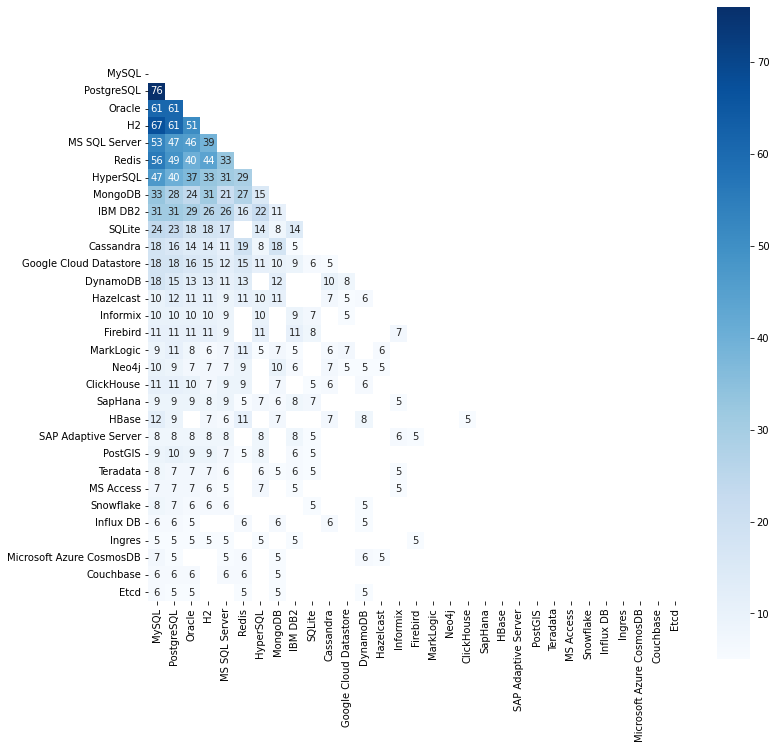

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ordena as linhas (Antecedents) para que as maiores somas venham primeiro
ordered_rows = pivot_filled.sum(axis=1).sort_values(ascending=False).index  # Ordena as linhas

# Ordena as colunas (Consequents) para que as maiores somas venham primeiro
ordered_cols = pivot_filled.sum(axis=0).sort_values(ascending=False).index  # Ordena as colunas

# Reordena a tabela pivotada tanto pelas linhas quanto pelas colunas
pivot_ordered = pivot_filled.loc[ordered_rows, ordered_cols]

# Cria a máscara para o triângulo superior na matriz reordenada
mask_lower = np.triu(np.ones(pivot_ordered.shape), k=0)

# Configura o heatmap com a tabela reordenada
sns.heatmap(
    pivot_ordered, 
    mask=mask_lower, 
    xticklabels=True, 
    yticklabels=True, 
    annot=True, 
    cmap=sns.color_palette("Blues", as_cmap=True), 
    square=True
)

# Adiciona legendas para os eixos X e Y
#plt.xlabel("Consequents")
#plt.ylabel("Antecedents")

# Ajusta o tamanho da figura
fig = plt.gcf()
fig.set_size_inches(12, 12)

# Salva o gráfico em um arquivo PDF
plt.savefig(IMAGES_DIR + "/heat_v10.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [212]:
lista = []
lista = orules1c['Antecedents'].drop_duplicates()
lista

0                       MySQL
30                 PostgreSQL
59                         H2
83                     Oracle
107                     Redis
126                  HyperSQL
142             MS SQL Server
164                   MongoDB
180                   IBM DB2
193                  DynamoDB
202    Google Cloud Datastore
209                    SQLite
217                 Cassandra
223                  Firebird
226                 Hazelcast
229                  Informix
233                     HBase
Name: Antecedents, dtype: category
Categories (31, object): ['MySQL', 'PostgreSQL', 'H2', 'Oracle', ..., 'Influx DB', 'Couchbase', 'Etcd', 'Ingres']

In [213]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')

In [214]:
pivot = pivot.reset_index()

In [215]:
pivot

Consequents             Antecedents  PostgreSQL    H2  Oracle  Redis  \
0                             MySQL        76.0  67.0    61.0   56.0   
1                        PostgreSQL         NaN  61.0    61.0   49.0   
2                                H2         NaN   NaN    51.0   44.0   
3                            Oracle         NaN   NaN     NaN    NaN   
4                             Redis         NaN   NaN    40.0    NaN   
5                          HyperSQL         NaN   NaN     NaN    NaN   
6                     MS SQL Server         NaN   NaN     NaN    NaN   
7                           MongoDB         NaN   NaN     NaN    NaN   
8                           IBM DB2         NaN   NaN     NaN    NaN   
9                          DynamoDB         NaN   NaN     NaN    NaN   
10           Google Cloud Datastore         NaN   NaN     NaN    NaN   
11                           SQLite         NaN   NaN     NaN    NaN   
12                        Cassandra         NaN   NaN     NaN    NaN   
13                         Firebird         NaN   NaN     NaN    NaN   
14                        Hazelcast         NaN   NaN     NaN    NaN   
15                         Informix         NaN   NaN     NaN    NaN   
16                            HBase         NaN   NaN     NaN    NaN   

Consequents  HyperSQL  MS SQL Server  MongoDB  IBM DB2  DynamoDB  \
0                47.0           53.0     33.0     31.0      18.0   
1                40.0           47.0     28.0     31.0      15.0   
2                33.0           39.0     31.0     26.0      13.0   
3                37.0           46.0     24.0     29.0      13.0   
4                29.0           33.0     27.0     16.0      13.0   
5                 NaN           31.0     15.0     22.0       NaN   
6                 NaN            NaN     21.0     26.0      11.0   
7                 NaN            NaN      NaN     11.0      12.0   
8                 NaN            NaN      NaN      NaN       NaN   
9                 NaN            NaN      NaN      NaN       NaN   
10                NaN            NaN      NaN      NaN       8.0   
11                NaN            NaN      NaN      NaN       NaN   
12                NaN            NaN      NaN      NaN       NaN   
13                NaN            NaN      NaN      NaN       NaN   
14                NaN            NaN      NaN      NaN       NaN   
15                NaN            NaN      NaN      NaN       NaN   
16                NaN            NaN      NaN      NaN       NaN   

Consequents  Google Cloud Datastore  SQLite  Cassandra  Firebird  Hazelcast  \
0                              18.0    24.0       18.0      11.0       10.0   
1                              18.0    23.0       16.0      11.0       12.0   
2                              15.0    18.0       14.0      11.0       11.0   
3                              16.0    18.0       14.0      11.0       11.0   
4                              15.0     NaN       19.0       NaN       11.0   
5                              11.0    14.0        8.0      11.0       10.0   
6                              12.0    17.0       11.0       9.0        9.0   
7                              10.0     8.0       18.0       NaN       11.0   
8                               9.0    14.0        5.0      11.0        NaN   
9                               NaN     NaN       10.0       NaN        6.0   
10                              NaN     6.0        5.0       NaN        5.0   
11                              NaN     NaN        NaN       8.0        NaN   
12                              NaN     NaN        NaN       NaN        7.0   
13                              NaN     NaN        NaN       NaN        NaN   
14                              NaN     NaN        NaN       NaN        NaN   
15                              NaN     NaN        NaN       NaN        NaN   
16                              NaN     NaN        NaN       NaN        NaN   

Consequents  Informix  HBase  MarkLogic  ClickHouse  Ne

In [216]:
#Test generating the graph with all the rules ordered with the sort function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
fig = px.scatter(orules1c, x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text= 'support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [217]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

Antecedents               Consequents  antecedent support  \
0                     MySQL                PostgreSQL            0.484848   
1                     MySQL                        H2            0.484848   
30               PostgreSQL                        H2            0.402597   
2                     MySQL                    Oracle            0.484848   
31               PostgreSQL                    Oracle            0.402597   
3                     MySQL                     Redis            0.484848   
5                     MySQL             MS SQL Server            0.484848   
59                       H2                    Oracle            0.389610   
32               PostgreSQL                     Redis            0.402597   
4                     MySQL                  HyperSQL            0.484848   
34               PostgreSQL             MS SQL Server            0.402597   
84                   Oracle             MS SQL Server            0.341991   
60                       H2                     Redis            0.389610   
107                   Redis                    Oracle            0.350649   
33               PostgreSQL                  HyperSQL            0.402597   
62                       H2             MS SQL Server            0.389610   
83                   Oracle                  HyperSQL            0.341991   
6                     MySQL                   MongoDB            0.484848   
109                   Redis             MS SQL Server            0.350649   
61                       H2                  HyperSQL            0.389610   
36               PostgreSQL                   IBM DB2            0.402597   
63                       H2                   MongoDB            0.389610   
7                     MySQL                   IBM DB2            0.484848   
126                HyperSQL             MS SQL Server            0.242424   
86                   Oracle                   IBM DB2            0.341991   
108                   Redis                  HyperSQL            0.350649   
35               PostgreSQL                   MongoDB            0.402597   
110                   Redis                   MongoDB            0.350649   
64                       H2                   IBM DB2            0.389610   
143           MS SQL Server                   IBM DB2            0.238095   
85                   Oracle                   MongoDB            0.341991   
10                    MySQL                    SQLite            0.484848   
39               PostgreSQL                    SQLite            0.402597   
128                HyperSQL                   IBM DB2            0.242424   
142           MS SQL Server                   MongoDB            0.238095   
114                   Redis                 Cassandra            0.350649   
38               PostgreSQL    Google Cloud Datastore            0.402597   
168                 MongoDB                 Cassandra            0.186147   
89                   Oracle                    SQLite            0.341991   
8                     MySQL                  DynamoDB            0.484848   
9                     MySQL    Google Cloud Datastore            0.484848   
11                    MySQL                 Cassandra            0.484848   
67                       H2                    SQLite            0.389610   
146           MS SQL Server                    SQLite            0.238095   
40               PostgreSQL                 Cassandra            0.402597   
88                   Oracle    Google Cloud Datastore            0.341991   
111                   Redis                   IBM DB2            0.350649   
37               PostgreSQL                  DynamoDB            0.402597   
66                       H2    Google Cloud Datastore            0.389610   
113                   Redis    Google Cloud Datastore            0.350649   
127                HyperSQL                   MongoDB            0.242424   
90          

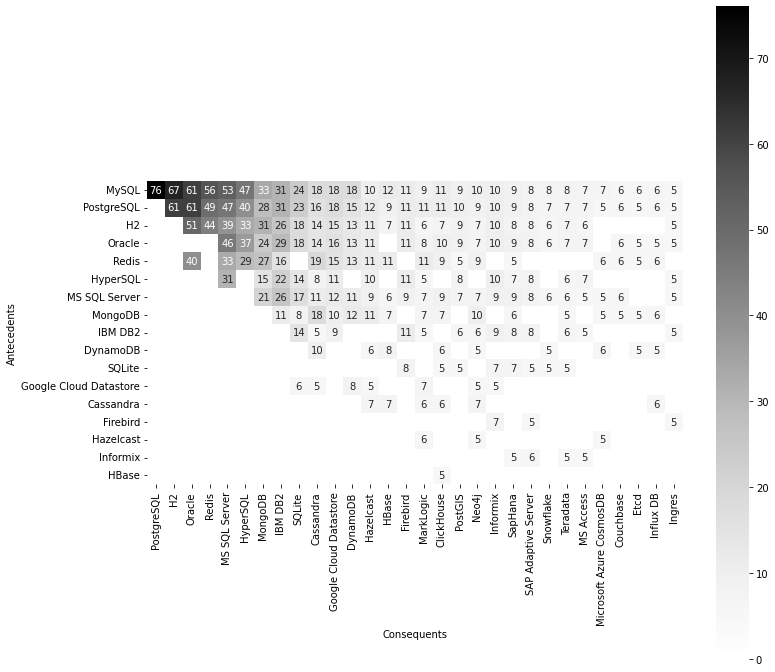

In [218]:
#Test sorting only by support, after the sort function
import seaborn as sns
pivot = orules1cd.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True), square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig14.pdf", format="pdf", bbox_inches="tight")

In [219]:
num_unicos = orules1cd['Antecedents'].nunique()
#print(num_unicos)

colunas_unicas = orules1cd['Consequents'].nunique()
#print(colunas_unicas)

intersecao = set(orules1cd['Antecedents']).intersection(orules1cd['Consequents'])
tam_intersecao = len(intersecao)
#print(tam_intersecao)

dif1 = num_unicos - tam_intersecao
dif2 = colunas_unicas - tam_intersecao
Total = dif1 + dif2 + tam_intersecao

print(Total)

31


Running the cells grouping by consequents and antecedents to identify the most used DBs together

In [220]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  \
antecedents              consequents                                    
PostgreSQL               MySQL                               0.402597   
MySQL                    PostgreSQL                          0.484848   
                         H2                                  0.484848   
H2                       MySQL                               0.389610   
                         PostgreSQL                          0.389610   
PostgreSQL               H2                                  0.402597   
                         Oracle                              0.402597   
Oracle                   MySQL                               0.341991   
                         PostgreSQL                          0.341991   
MySQL                    Oracle                              0.484848   
                         Redis                               0.484848   
Redis                    MySQL                               0.350649   
MySQL                    MS SQL Server                       0.484848   
MS SQL Server            MySQL                               0.238095   
H2                       Oracle                              0.389610   
Oracle                   H2                                  0.341991   
PostgreSQL               Redis                               0.402597   
Redis                    PostgreSQL                          0.350649   
MySQL                    HyperSQL                            0.484848   
HyperSQL                 MySQL                               0.242424   
MS SQL Server            PostgreSQL                          0.238095   
PostgreSQL               MS SQL Server                       0.402597   
Oracle                   MS SQL Server                       0.341991   
MS SQL Server            Oracle                              0.238095   
Redis                    H2                                  0.350649   
H2                       Redis                               0.389610   
PostgreSQL               HyperSQL                            0.402597   
Redis                    Oracle                              0.350649   
Oracle                   Redis                               0.341991   
HyperSQL                 PostgreSQL                          0.242424   
MS SQL Server            H2                                  0.238095   
H2                       MS SQL Server                       0.389610   
HyperSQL                 Oracle                              0.242424   
Oracle                   HyperSQL                            0.341991   
Redis                    MS SQL Server                       0.350649   
HyperSQL                 H2                                  0.242424   
H2                       HyperSQL                            0.389610   
MongoDB                  MySQL                               0.186147   
MySQL                    MongoDB                             0.484848   
MS SQL Server            Redis                               0.238095   
IBM DB2                  PostgreSQL                          0.134199   
PostgreSQL               IBM DB2                             0.402597   
HyperSQL                 MS SQL Server                       0.242424   
MS SQL Server            HyperSQL                            0.238095   
MongoDB                  H2                                  0.186147   
MySQL                    IBM DB2                             0.484848   
H2                       MongoDB                             0.389610   
IBM DB2                  MySQL                               0.134199   
HyperSQL                 Redis                               0.242424   
Redis                    HyperSQL                            0.350649   
IBM DB2                  Oracle                              0.134199   
Oracle                   IBM DB2                             0.341991   
MongoDB                  PostgreSQL                          0.186147   
PostgreSQL               MongoDB    

In [221]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

antecedent support  antecedent_sup_abs  \
consequents                                                        
MySQL                               0.116306           27.215584   
PostgreSQL                          0.119048           27.857143   
H2                                  0.133533           31.246753   
Redis                               0.147776           34.579693   
Oracle                              0.126314           29.557514   
HyperSQL                            0.157081           36.756957   
MS SQL Server                       0.131416           30.751391   
IBM DB2                             0.160998           37.673469   
MongoDB                             0.153586           35.939018   
SQLite                              0.169086           39.566081   
Cassandra                           0.196333           45.941940   
Google Cloud Datastore              0.208333           48.750000   
DynamoDB                            0.174943           40.936593   
Firebird                            0.223534           52.306966   
Hazelcast                           0.222635           52.096475   
HBase                               0.257816           60.329004   
ClickHouse                          0.255018           59.674144   
Informix                            0.191095           44.716141   
PostGIS                             0.301106           70.458874   
SapHana                             0.267218           62.528926   
MarkLogic                           0.255772           59.850649   
Neo4j                               0.246032           57.571429   
SAP Adaptive Server                 0.245022           57.335065   
Teradata                            0.258874           60.576623   
Snowflake                           0.301175           70.474954   
MS Access                           0.284632           66.603896   
Couchbase                           0.334055           78.168831   
Influx DB                           0.283859           66.423006   
Microsoft Azure CosmosDB            0.265925           62.226345   
Etcd                                0.315296           73.779221   
Ingres                              0.285173           66.730519   

                          consequent support  consequent_sup_abs   support  \
consequents                                                                  
MySQL                               0.484848          113.454545  0.094372   
PostgreSQL                          0.402597           94.207792  0.088456   
H2                                  0.389610           91.168831  0.086580   
Redis                               0.350649           82.051948  0.083628   
Oracle                              0.341991           80.025974  0.082560   
HyperSQL                            0.242424           56.727273  0.075036   
MS SQL Server                       0.238095           55.714286  0.071119   
IBM DB2                             0.134199           31.402597  0.059575   
MongoDB                             0.186147           43.558442  0.058724   
SQLite                              0.125541           29.376623  0.048128   
Cassandra                           0.095238           22.285714  0.045073   
Google Cloud Datastore              0.129870           30.389610  0.044643   
DynamoDB                            0.125541           29.376623  0.040489   
Firebird                            0.047619           11.142857  0.039355   
Hazelcast                           0.073593           17.220779  0.036797   
HBase                               0.064935           15.194805  0.034632   
ClickHouse                          0.047619           11.142857  0.033845   
Informix                            0.043290           10.129870  0.033395   
PostGIS                             0.043290           10.129870  0.032708   
SapHana                             0.038961            9.116883  0.032271   
MarkLogic                           0.051948           12.155844 

In [222]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values('support', ascending=False)
rules1ca

antecedent support  antecedent_sup_abs  \
antecedents                                                        
MySQL                               0.484848          113.454545   
PostgreSQL                          0.402597           94.207792   
H2                                  0.389610           91.168831   
Redis                               0.350649           82.051948   
Oracle                              0.341991           80.025974   
HyperSQL                            0.242424           56.727273   
MS SQL Server                       0.238095           55.714286   
IBM DB2                             0.134199           31.402597   
MongoDB                             0.186147           43.558442   
SQLite                              0.125541           29.376623   
Cassandra                           0.095238           22.285714   
Google Cloud Datastore              0.129870           30.389610   
DynamoDB                            0.125541           29.376623   
Firebird                            0.047619           11.142857   
Hazelcast                           0.073593           17.220779   
HBase                               0.064935           15.194805   
ClickHouse                          0.047619           11.142857   
Informix                            0.043290           10.129870   
PostGIS                             0.043290           10.129870   
SapHana                             0.038961            9.116883   
MarkLogic                           0.051948           12.155844   
Neo4j                               0.047619           11.142857   
SAP Adaptive Server                 0.034632            8.103896   
Teradata                            0.034632            8.103896   
Snowflake                           0.034632            8.103896   
MS Access                           0.030303            7.090909   
Couchbase                           0.025974            6.077922   
Influx DB                           0.025974            6.077922   
Microsoft Azure CosmosDB            0.030303            7.090909   
Etcd                                0.030303            7.090909   
Ingres                              0.021645            5.064935   

                          consequent support  consequent_sup_abs   support  \
antecedents                                                                  
MySQL                               0.116306           27.215584  0.094372   
PostgreSQL                          0.119048           27.857143  0.088456   
H2                                  0.133533           31.246753  0.086580   
Redis                               0.147776           34.579693  0.083628   
Oracle                              0.126314           29.557514  0.082560   
HyperSQL                            0.157081           36.756957  0.075036   
MS SQL Server                       0.131416           30.751391  0.071119   
IBM DB2                             0.160998           37.673469  0.059575   
MongoDB                             0.153586           35.939018  0.058724   
SQLite                              0.169086           39.566081  0.048128   
Cassandra                           0.196333           45.941940  0.045073   
Google Cloud Datastore              0.208333           48.750000  0.044643   
DynamoDB                            0.174943           40.936593  0.040489   
Firebird                            0.223534           52.306966  0.039355   
Hazelcast                           0.222635           52.096475  0.036797   
HBase                               0.257816           60.329004  0.034632   
ClickHouse                          0.255018           59.674144  0.033845   
Informix                            0.191095           44.716141  0.033395   
PostGIS                             0.301106           70.458874  0.032708   
SapHana                             0.267218           62.528926  0.032271   
MarkLogic                           0.255772           59.850649 

In [223]:
# To filter only the 10 most used in the current version
rules1cb = rules1ca[(rules1ca['support'] >= 0.05)] 
rules1cb

antecedent support  antecedent_sup_abs  consequent support  \
antecedents                                                                 
MySQL                    0.484848          113.454545            0.116306   
PostgreSQL               0.402597           94.207792            0.119048   
H2                       0.389610           91.168831            0.133533   
Redis                    0.350649           82.051948            0.147776   
Oracle                   0.341991           80.025974            0.126314   
HyperSQL                 0.242424           56.727273            0.157081   
MS SQL Server            0.238095           55.714286            0.131416   
IBM DB2                  0.134199           31.402597            0.160998   
MongoDB                  0.186147           43.558442            0.153586   

               consequent_sup_abs   support  support_abs  confidence  \
antecedents                                                            
MySQL                   27.215584  0.094372    22.083117    0.194643   
PostgreSQL              27.857143  0.088456    20.698701    0.219713   
H2                      31.246753  0.086580    20.259740    0.222222   
Redis                   34.579693  0.083628    19.569067    0.238496   
Oracle                  29.557514  0.082560    19.319109    0.241410   
HyperSQL                36.756957  0.075036    17.558442    0.309524   
MS SQL Server           30.751391  0.071119    16.641929    0.298701   
IBM DB2                 37.673469  0.059575    13.940631    0.443932   
MongoDB                 35.939018  0.058724    13.741389    0.315470   

                   lift  leverage  conviction  antecedent_len  consequente_len  
antecedents                                                                     
MySQL          1.805818  0.037982    1.139251             1.0              1.0  
PostgreSQL     2.054191  0.040528    1.218046             1.0              1.0  
H2             1.842446  0.034554    1.174398             1.0              1.0  
Redis          1.899892  0.031811    1.158954             1.0              1.0  
Oracle         2.237130  0.039362    1.254447             1.0              1.0  
HyperSQL       2.594957  0.036956    1.368591             1.0              1.0  
MS SQL Server  2.769274  0.039830    1.889820             1.0              1.0  
IBM DB2        4.048835  0.037970         NaN             1.0              1.0  
MongoDB        2.853997  0.030134    1.332750             1.0              1.0

Identifying the antecedents and consequences that lead to the use of the 10 most used DBs

In [224]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

antecedents consequents  antecedent support  \
281                  Informix       MySQL            0.043290   
283                   SapHana       MySQL            0.038961   
285                   IBM DB2       MySQL            0.134199   
287                    Ingres       MySQL            0.021645   
290                 MS Access       MySQL            0.030303   
292       SAP Adaptive Server       MySQL            0.034632   
293                ClickHouse       MySQL            0.047619   
295                 Couchbase       MySQL            0.025974   
297                  Firebird       MySQL            0.047619   
298  Microsoft Azure CosmosDB       MySQL            0.030303   
301                 Snowflake       MySQL            0.034632   
302                  Teradata       MySQL            0.034632   
304                 Influx DB       MySQL            0.025974   
315             MS SQL Server       MySQL            0.238095   
330                     Neo4j       MySQL            0.047619   
337                   PostGIS       MySQL            0.043290   
358                      Etcd       MySQL            0.030303   
365                  HyperSQL       MySQL            0.242424   
371                    SQLite       MySQL            0.125541   
375                 Cassandra       MySQL            0.095238   
377                PostgreSQL       MySQL            0.402597   
388                     HBase       MySQL            0.064935   
407                    Oracle       MySQL            0.341991   
410                   MongoDB       MySQL            0.186147   
415                 MarkLogic       MySQL            0.051948   
416                        H2       MySQL            0.389610   

     antecedent_sup_abs  consequent support  consequent_sup_abs   support  \
281           10.129870            0.484848          113.454545  0.043290   
283            9.116883            0.484848          113.454545  0.038961   
285           31.402597            0.484848          113.454545  0.134199   
287            5.064935            0.484848          113.454545  0.021645   
290            7.090909            0.484848          113.454545  0.030303   
292            8.103896            0.484848          113.454545  0.034632   
293           11.142857            0.484848          113.454545  0.047619   
295            6.077922            0.484848          113.454545  0.025974   
297           11.142857            0.484848          113.454545  0.047619   
298            7.090909            0.484848          113.454545  0.030303   
301            8.103896            0.484848          113.454545  0.034632   
302            8.103896            0.484848          113.454545  0.034632   
304            6.077922            0.484848          113.454545  0.025974   
315           55.714286            0.484848          113.454545  0.229437   
330           11.142857            0.484848          113.454545  0.043290   
337           10.129870            0.484848          113.454545  0.038961   
358            7.090909            0.484848          113.454545  0.025974   
365           56.727273            0.484848          113.454545  0.203463   
371           29.376623            0.484848          113.454545  0.103896   
375           22.285714            0.484848          113.454545  0.077922   
377           94.207792            0.484848          113.454545  0.329004   
388           15.194805            0.484848          113.454545  0.051948   
407           80.025974            0.484848          113.454545  0.264069   
410           43.558442            0.484848          113.454545  0.142857   
415           12.155844            0.484848          113.454545  0.038961   
416           91.168831            0.484848          113.454545  0.290043   

     support_abs  confidence      lift  leverage  conviction  antecedent_len  \
281    10.129870    1.000000  2.062500  0.022301         inf               1   
283     9.116883    1.

In [225]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
pd.set_option('display.max_rows', None)     # Exibe todas as linhas
pd.set_option('display.max_columns', None) 
rules3

antecedents               consequents  antecedent support  \
202                   PostGIS                PostgreSQL            0.043290   
203                PostgreSQL                   PostGIS            0.402597   
204                 Couchbase                PostgreSQL            0.025974   
205                PostgreSQL                  Firebird            0.402597   
206                PostgreSQL       SAP Adaptive Server            0.402597   
207       SAP Adaptive Server                PostgreSQL            0.034632   
208                ClickHouse                PostgreSQL            0.047619   
209                PostgreSQL                ClickHouse            0.402597   
210                  Firebird                PostgreSQL            0.047619   
211                  Informix                PostgreSQL            0.043290   
212                PostgreSQL                  Informix            0.402597   
213                 Influx DB                PostgreSQL            0.025974   
214                   SapHana                PostgreSQL            0.038961   
215                PostgreSQL                   SapHana            0.402597   
216                PostgreSQL                    Ingres            0.402597   
217                   IBM DB2                PostgreSQL            0.134199   
218                    Ingres                PostgreSQL            0.021645   
219                PostgreSQL                 MS Access            0.402597   
220                 MS Access                PostgreSQL            0.030303   
221                PostgreSQL                 Couchbase            0.402597   
222                PostgreSQL                 Influx DB            0.402597   
223                PostgreSQL                   IBM DB2            0.402597   
248                PostgreSQL                 MarkLogic            0.402597   
249                 MarkLogic                PostgreSQL            0.051948   
264                PostgreSQL                  Teradata            0.402597   
265                  Teradata                PostgreSQL            0.034632   
266                PostgreSQL                 Snowflake            0.402597   
267                 Snowflake                PostgreSQL            0.034632   
272             MS SQL Server                PostgreSQL            0.238095   
273                PostgreSQL             MS SQL Server            0.402597   
310                PostgreSQL                     Neo4j            0.402597   
311                     Neo4j                PostgreSQL            0.047619   
316                    SQLite                PostgreSQL            0.125541   
317                PostgreSQL                    SQLite            0.402597   
324                PostgreSQL                    Oracle            0.402597   
325                    Oracle                PostgreSQL            0.341991   
346                PostgreSQL                 Cassandra            0.402597   
347                 Cassandra                PostgreSQL            0.095238   
352  Microsoft Azure CosmosDB                PostgreSQL            0.030303   
353                PostgreSQL                  HyperSQL            0.402597   
354                  HyperSQL                PostgreSQL            0.242424   
355                      Etcd                PostgreSQL            0.030303   
356                PostgreSQL                      Etcd            0.402597   
357                PostgreSQL  Microsoft Azure CosmosDB            0.402597   
360                PostgreSQL                 Hazelcast            0.402597   
361                 Hazelcast                PostgreSQL            0.073593   
376                     MySQL                PostgreSQL            0.484848   
377                PostgreSQL                     MySQL            0.402597   
378                        H2                PostgreSQL            0.389610   
379                PostgreSQL                        H2            0

In [226]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

antecedents consequents  antecedent support  antecedent_sup_abs  \
191             Informix          H2            0.043290           10.129870   
192             Firebird          H2            0.047619           11.142857   
193  SAP Adaptive Server          H2            0.034632            8.103896   
195               Ingres          H2            0.021645            5.064935   
245              PostGIS          H2            0.043290           10.129870   
246              SapHana          H2            0.038961            9.116883   
253             Teradata          H2            0.034632            8.103896   
260            MS Access          H2            0.030303            7.090909   
268              IBM DB2          H2            0.134199           31.402597   
323            Snowflake          H2            0.034632            8.103896   
338              MongoDB          H2            0.186147           43.558442   
343        MS SQL Server          H2            0.238095           55.714286   

     consequent support  consequent_sup_abs   support  support_abs  \
191             0.38961           91.168831  0.043290    10.129870   
192             0.38961           91.168831  0.047619    11.142857   
193             0.38961           91.168831  0.034632     8.103896   
195             0.38961           91.168831  0.021645     5.064935   
245             0.38961           91.168831  0.038961     9.116883   
246             0.38961           91.168831  0.034632     8.103896   
253             0.38961           91.168831  0.030303     7.090909   
260             0.38961           91.168831  0.025974     6.077922   
268             0.38961           91.168831  0.112554    26.337662   
323             0.38961           91.168831  0.025974     6.077922   
338             0.38961           91.168831  0.134199    31.402597   
343             0.38961           91.168831  0.168831    39.506494   

     confidence      lift  leverage  conviction  antecedent_len  \
191    1.000000  2.566667  0.026424         inf               1   
192    1.000000  2.566667  0.029066         inf               1   
193    1.000000  2.566667  0.021139         inf               1   
195    1.000000  2.566667  0.013212         inf               1   
245    0.900000  2.310000  0.022095    6.103896               1   
246    0.888889  2.281481  0.019452    5.493506               1   
253    0.875000  2.245833  0.016810    4.883117               1   
260    0.857143  2.200000  0.014168    4.272727               1   
268    0.838710  2.152688  0.060269    3.784416               1   
323    0.750000  1.925000  0.012481    2.441558               1   
338    0.720930  1.850388  0.061674    2.187229               1   
343    0.709091  1.820000  0.076067    2.098214               1   

     consequente_len  
191                1  
192                1  
193                1  
195                1  
245                1  
246                1  
253                1  
260                1  
268                1  
323                1  
338                1  
343                1

In [227]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

antecedents consequents  antecedent support  antecedent_sup_abs  \
165              SapHana      Oracle            0.038961            9.116883   
166             Informix      Oracle            0.043290           10.129870   
168             Firebird      Oracle            0.047619           11.142857   
169  SAP Adaptive Server      Oracle            0.034632            8.103896   
170            Couchbase      Oracle            0.025974            6.077922   
171            MS Access      Oracle            0.030303            7.090909   
172               Ingres      Oracle            0.021645            5.064935   
180              IBM DB2      Oracle            0.134199           31.402597   
184           ClickHouse      Oracle            0.047619           11.142857   
186              PostGIS      Oracle            0.043290           10.129870   
199             Teradata      Oracle            0.034632            8.103896   
231        MS SQL Server      Oracle            0.238095           55.714286   
234            Influx DB      Oracle            0.025974            6.077922   
263            Snowflake      Oracle            0.034632            8.103896   
279                 Etcd      Oracle            0.030303            7.090909   

     consequent support  consequent_sup_abs   support  support_abs  \
165            0.341991           80.025974  0.038961     9.116883   
166            0.341991           80.025974  0.043290    10.129870   
168            0.341991           80.025974  0.047619    11.142857   
169            0.341991           80.025974  0.034632     8.103896   
170            0.341991           80.025974  0.025974     6.077922   
171            0.341991           80.025974  0.030303     7.090909   
172            0.341991           80.025974  0.021645     5.064935   
180            0.341991           80.025974  0.125541    29.376623   
184            0.341991           80.025974  0.043290    10.129870   
186            0.341991           80.025974  0.038961     9.116883   
199            0.341991           80.025974  0.030303     7.090909   
231            0.341991           80.025974  0.199134    46.597403   
234            0.341991           80.025974  0.021645     5.064935   
263            0.341991           80.025974  0.025974     6.077922   
279            0.341991           80.025974  0.021645     5.064935   

     confidence      lift  leverage  conviction  antecedent_len  \
165    1.000000  2.924051  0.025637         inf               1   
166    1.000000  2.924051  0.028485         inf               1   
168    1.000000  2.924051  0.031334         inf               1   
169    1.000000  2.924051  0.022788         inf               1   
170    1.000000  2.924051  0.017091         inf               1   
171    1.000000  2.924051  0.019940         inf               1   
172    1.000000  2.924051  0.014243         inf               1   
180    0.935484  2.735402  0.079646   10.199134               1   
184    0.909091  2.658228  0.027005    7.238095               1   
186    0.900000  2.631646  0.024156    6.580087               1   
199    0.875000  2.558544  0.018459    5.264069               1   
231    0.836364  2.445570  0.117708    4.021164               1   
234    0.833333  2.436709  0.012762    3.948052               1   
263    0.750000  2.193038  0.014130    2.632035               1   
279    0.714286  2.088608  0.011282    2.303030               1   

     consequente_len  
165                1  
166                1  
168                1  
169                1  
170                1  
171                1  
172                1  
180                1  
184                1  
186                1  
199                1  
231                1  
234                1  
263                1  
279                1

In [228]:
rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, antecedent_sup_abs, consequent support, consequent_sup_abs, support, support_abs, confidence, lift, leverage, conviction, antecedent_len, consequente_len]
Index: []

In [229]:
rules7 = df[ (df['consequents'].str.contains('Redis')) ] #& (df['confidence'] > 0.7)]
rules7

unique_count = rules7['antecedents'].nunique()
print(f"Número de valores únicos em 'Antecedentes': {unique_count}")


Número de valores únicos em 'Antecedentes': 22


In [230]:
rules8 = df[ (df['consequents'].str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules8

antecedents consequents  antecedent support  antecedent_sup_abs  \
39     SapHana      SQLite            0.038961            9.116883   
43    Firebird      SQLite            0.047619           11.142857   
51    Informix      SQLite            0.043290           10.129870   

    consequent support  consequent_sup_abs   support  support_abs  confidence  \
39            0.125541           29.376623  0.030303     7.090909    0.777778   
43            0.125541           29.376623  0.034632     8.103896    0.727273   
51            0.125541           29.376623  0.030303     7.090909    0.700000   

        lift  leverage  conviction  antecedent_len  consequente_len  
39  6.195402  0.025412    3.935065               1                1  
43  5.793103  0.028654    3.206349               1                1  
51  5.575862  0.024868    2.914863               1                1

In [231]:
rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9

antecedents consequents  antecedent support  \
53                  Influx DB     MongoDB            0.025974   
69                      Neo4j     MongoDB            0.047619   
72                  Couchbase     MongoDB            0.025974   
76                  Cassandra     MongoDB            0.095238   
108  Microsoft Azure CosmosDB     MongoDB            0.030303   
111                      Etcd     MongoDB            0.030303   

     antecedent_sup_abs  consequent support  consequent_sup_abs   support  \
53             6.077922            0.186147           43.558442  0.025974   
69            11.142857            0.186147           43.558442  0.043290   
72             6.077922            0.186147           43.558442  0.021645   
76            22.285714            0.186147           43.558442  0.077922   
108            7.090909            0.186147           43.558442  0.021645   
111            7.090909            0.186147           43.558442  0.021645   

     support_abs  confidence      lift  leverage  conviction  antecedent_len  \
53      6.077922    1.000000  5.372093  0.021139         inf               1   
69     10.129870    0.909091  4.883721  0.034426    8.952381               1   
72      5.064935    0.833333  4.476744  0.016810    4.883117               1   
76     18.233766    0.818182  4.395349  0.060194    4.476190               1   
108     5.064935    0.714286  3.837209  0.016004    2.848485               1   
111     5.064935    0.714286  3.837209  0.016004    2.848485               1   

     consequente_len  
53                 1  
69                 1  
72                 1  
76                 1  
108                1  
111                1

In [232]:
rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10

antecedents    consequents  antecedent support  \
85        SAP Adaptive Server  MS SQL Server            0.034632   
86                    SapHana  MS SQL Server            0.038961   
88                  Couchbase  MS SQL Server            0.025974   
91                     Ingres  MS SQL Server            0.021645   
113                  Informix  MS SQL Server            0.043290   
124                   IBM DB2  MS SQL Server            0.134199   
130                ClickHouse  MS SQL Server            0.047619   
131                  Firebird  MS SQL Server            0.047619   
142                  Teradata  MS SQL Server            0.034632   
143                 Snowflake  MS SQL Server            0.034632   
154  Microsoft Azure CosmosDB  MS SQL Server            0.030303   
155                 MS Access  MS SQL Server            0.030303   
156                   PostGIS  MS SQL Server            0.043290   

     antecedent_sup_abs  consequent support  consequent_sup_abs   support  \
85             8.103896            0.238095           55.714286  0.034632   
86             9.116883            0.238095           55.714286  0.038961   
88             6.077922            0.238095           55.714286  0.025974   
91             5.064935            0.238095           55.714286  0.021645   
113           10.129870            0.238095           55.714286  0.038961   
124           31.402597            0.238095           55.714286  0.112554   
130           11.142857            0.238095           55.714286  0.038961   
131           11.142857            0.238095           55.714286  0.038961   
142            8.103896            0.238095           55.714286  0.025974   
143            8.103896            0.238095           55.714286  0.025974   
154            7.090909            0.238095           55.714286  0.021645   
155            7.090909            0.238095           55.714286  0.021645   
156           10.129870            0.238095           55.714286  0.030303   

     support_abs  confidence      lift  leverage  conviction  antecedent_len  \
85      8.103896    1.000000  4.200000  0.026386         inf               1   
86      9.116883    1.000000  4.200000  0.029685         inf               1   
88      6.077922    1.000000  4.200000  0.019790         inf               1   
91      5.064935    1.000000  4.200000  0.016491         inf               1   
113     9.116883    0.900000  3.780000  0.028654    7.619048               1   
124    26.337662    0.838710  3.522581  0.080602    4.723810               1   
130     9.116883    0.818182  3.436364  0.027623    4.190476               1   
131     9.116883    0.818182  3.436364  0.027623    4.190476               1   
142     6.077922    0.750000  3.150000  0.017728    3.047619               1   
143     6.077922    0.750000  3.150000  0.017728    3.047619               1   
154     5.064935    0.714286  3.000000  0.014430    2.666667               1   
155     5.064935    0.714286  3.000000  0.014430    2.666667               1   
156     7.090909    0.700000  2.940000  0.019996    2.539683               1   

     consequente_len  
85                 1  
86                 1  
88                 1  
91                 1  
113                1  
124                1  
130                1  
131                1  
142                1  
143                1  
154                1  
155                1  
156                1

In [233]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, antecedent_sup_abs, consequent support, consequent_sup_abs, support, support_abs, confidence, lift, leverage, conviction, antecedent_len, consequente_len]
Index: []

Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [234]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, antecedent_sup_abs, consequent support, consequent_sup_abs, support, support_abs, confidence, lift, leverage, conviction, antecedent_len, consequente_len]
Index: []

In [235]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
rules10

antecedents consequents  antecedent support  antecedent_sup_abs  \
202     PostGIS  PostgreSQL            0.043290           10.129870   
203  PostgreSQL     PostGIS            0.402597           94.207792   

     consequent support  consequent_sup_abs  support  support_abs  confidence  \
202            0.402597           94.207792  0.04329     10.12987    1.000000   
203            0.043290           10.129870  0.04329     10.12987    0.107527   

         lift  leverage  conviction  antecedent_len  consequente_len  
202  2.483871  0.025862         inf               1                1  
203  2.483871  0.025862    1.071976               1                1

In [236]:
rules11a = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11a

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, antecedent_sup_abs, consequent support, consequent_sup_abs, support, support_abs, confidence, lift, leverage, conviction, antecedent_len, consequente_len]
Index: []

In [237]:
rules12a = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12a

antecedents consequents  antecedent support  antecedent_sup_abs  \
202     PostGIS  PostgreSQL            0.043290           10.129870   
203  PostgreSQL     PostGIS            0.402597           94.207792   

     consequent support  consequent_sup_abs  support  support_abs  confidence  \
202            0.402597           94.207792  0.04329     10.12987    1.000000   
203            0.043290           10.129870  0.04329     10.12987    0.107527   

         lift  leverage  conviction  antecedent_len  consequente_len  
202  2.483871  0.025862         inf               1                1  
203  2.483871  0.025862    1.071976               1                1

Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [238]:
rulesTeste = df[ (df['consequents'] .str.contains('Cassandra')) & (df['confidence'] > 0.5) ]
rulesTeste

antecedents consequents  antecedent support  antecedent_sup_abs  \
15   Influx DB   Cassandra            0.025974            6.077922   
32       Neo4j   Cassandra            0.047619           11.142857   
45  ClickHouse   Cassandra            0.047619           11.142857   

    consequent support  consequent_sup_abs   support  support_abs  confidence  \
15            0.095238           22.285714  0.025974     6.077922    1.000000   
32            0.095238           22.285714  0.030303     7.090909    0.636364   
45            0.095238           22.285714  0.025974     6.077922    0.545455   

         lift  leverage  conviction  antecedent_len  consequente_len  
15  10.500000  0.023500         inf               1                1  
32   6.681818  0.025768    2.488095               1                1  
45   5.727273  0.021439    1.990476               1                1

In [239]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL'))) & (df['confidence'] > 0.7) ]
rules3

antecedents consequents  antecedent support  \
202                   PostGIS  PostgreSQL            0.043290   
204                 Couchbase  PostgreSQL            0.025974   
207       SAP Adaptive Server  PostgreSQL            0.034632   
208                ClickHouse  PostgreSQL            0.047619   
210                  Firebird  PostgreSQL            0.047619   
211                  Informix  PostgreSQL            0.043290   
213                 Influx DB  PostgreSQL            0.025974   
214                   SapHana  PostgreSQL            0.038961   
217                   IBM DB2  PostgreSQL            0.134199   
218                    Ingres  PostgreSQL            0.021645   
220                 MS Access  PostgreSQL            0.030303   
249                 MarkLogic  PostgreSQL            0.051948   
265                  Teradata  PostgreSQL            0.034632   
267                 Snowflake  PostgreSQL            0.034632   
272             MS SQL Server  PostgreSQL            0.238095   
311                     Neo4j  PostgreSQL            0.047619   
316                    SQLite  PostgreSQL            0.125541   
325                    Oracle  PostgreSQL            0.341991   
347                 Cassandra  PostgreSQL            0.095238   
352  Microsoft Azure CosmosDB  PostgreSQL            0.030303   
354                  HyperSQL  PostgreSQL            0.242424   
355                      Etcd  PostgreSQL            0.030303   
361                 Hazelcast  PostgreSQL            0.073593   
377                PostgreSQL       MySQL            0.402597   

     antecedent_sup_abs  consequent support  consequent_sup_abs   support  \
202           10.129870            0.402597           94.207792  0.043290   
204            6.077922            0.402597           94.207792  0.025974   
207            8.103896            0.402597           94.207792  0.034632   
208           11.142857            0.402597           94.207792  0.047619   
210           11.142857            0.402597           94.207792  0.047619   
211           10.129870            0.402597           94.207792  0.043290   
213            6.077922            0.402597           94.207792  0.025974   
214            9.116883            0.402597           94.207792  0.038961   
217           31.402597            0.402597           94.207792  0.134199   
218            5.064935            0.402597           94.207792  0.021645   
220            7.090909            0.402597           94.207792  0.030303   
249           12.155844            0.402597           94.207792  0.047619   
265            8.103896            0.402597           94.207792  0.030303   
267            8.103896            0.402597           94.207792  0.030303   
272           55.714286            0.402597           94.207792  0.203463   
311           11.142857            0.402597           94.207792  0.038961   
316           29.376623            0.402597           94.207792  0.099567   
325           80.025974            0.402597           94.207792  0.264069   
347           22.285714            0.402597           94.207792  0.069264   
352            7.090909            0.402597           94.207792  0.021645   
354           56.727273            0.402597           94.207792  0.173160   
355            7.090909            0.402597           94.207792  0.021645   
361           17.220779            0.402597           94.207792  0.051948   
377           94.207792            0.484848          113.454545  0.329004   

     support_abs  confidence      lift  leverage  conviction  antecedent_len  \
202    10.129870    1.000000  2.483871  0.025862         inf               1   
204     6.077922    1.000000  2.483871  0.015517         inf               1   
207     8.103896    1.000000  2.483871  0.020689         inf               1   
208    11.142857    1.000000  2.483871  0.028448         inf               1   
210    11.142857    1.000000  2.483871  0.028448         inf      

In [240]:
rulesSAP = df[ (df['antecedents'].str.contains('SAP Adaptive Server')) | (df['consequents'].str.contains('SAP Adaptive Server'))]# & (df['confidence'] > 0.7) ]
rulesSAP

antecedents          consequents  antecedent support  \
2               Informix  SAP Adaptive Server            0.043290   
3    SAP Adaptive Server             Informix            0.034632   
10              Firebird  SAP Adaptive Server            0.047619   
11   SAP Adaptive Server             Firebird            0.034632   
19               IBM DB2  SAP Adaptive Server            0.134199   
20   SAP Adaptive Server              IBM DB2            0.034632   
64   SAP Adaptive Server               SQLite            0.034632   
65                SQLite  SAP Adaptive Server            0.125541   
85   SAP Adaptive Server        MS SQL Server            0.034632   
89         MS SQL Server  SAP Adaptive Server            0.238095   
93   SAP Adaptive Server             HyperSQL            0.034632   
94              HyperSQL  SAP Adaptive Server            0.242424   
161               Oracle  SAP Adaptive Server            0.341991   
169  SAP Adaptive Server               Oracle            0.034632   
193  SAP Adaptive Server                   H2            0.034632   
194                   H2  SAP Adaptive Server            0.389610   
206           PostgreSQL  SAP Adaptive Server            0.402597   
207  SAP Adaptive Server           PostgreSQL            0.034632   
288                MySQL  SAP Adaptive Server            0.484848   
292  SAP Adaptive Server                MySQL            0.034632   

     antecedent_sup_abs  consequent support  consequent_sup_abs   support  \
2             10.129870            0.034632            8.103896  0.025974   
3              8.103896            0.043290           10.129870  0.025974   
10            11.142857            0.034632            8.103896  0.021645   
11             8.103896            0.047619           11.142857  0.021645   
19            31.402597            0.034632            8.103896  0.034632   
20             8.103896            0.134199           31.402597  0.034632   
64             8.103896            0.125541           29.376623  0.021645   
65            29.376623            0.034632            8.103896  0.021645   
85             8.103896            0.238095           55.714286  0.034632   
89            55.714286            0.034632            8.103896  0.034632   
93             8.103896            0.242424           56.727273  0.034632   
94            56.727273            0.034632            8.103896  0.034632   
161           80.025974            0.034632            8.103896  0.034632   
169            8.103896            0.341991           80.025974  0.034632   
193            8.103896            0.389610           91.168831  0.034632   
194           91.168831            0.034632            8.103896  0.034632   
206           94.207792            0.034632            8.103896  0.034632   
207            8.103896            0.402597           94.207792  0.034632   
288          113.454545            0.034632            8.103896  0.034632   
292            8.103896            0.484848          113.454545  0.034632   

     support_abs  confidence       lift  leverage  conviction  antecedent_len  \
2       6.077922    0.600000  17.325000  0.024475    2.413420               1   
3       6.077922    0.750000  17.325000  0.024475    3.826840               1   
10      5.064935    0.454545  13.125000  0.019996    1.769841               1   
11      5.064935    0.625000  13.125000  0.019996    2.539683               1   
19      8.103896    0.258065   7.451613  0.029984    1.301148               1   
20      8.103896    1.000000   7.451613  0.029984         inf               1   
64      5.064935    0.625000   4.978448  0.017297    2.331890               1   
65      5.064935    0.172414   4.978448  0.017297    1.166486               1   
85      8.103896    1.000000   4.200000  0.026386         inf               1   
89      8.103896    0.145455   4.200000  0.026386    1.129686               1   
93      8.103896    1.000000   4.125000  0.026236     

In [241]:
rules12 = df2[(df2['lift'] > 9)] #>20
rules12

antecedents               consequents  antecedent support  \
0                   Firebird                    Ingres            0.047619   
1                     Ingres                  Firebird            0.021645   
2                   Informix       SAP Adaptive Server            0.043290   
3        SAP Adaptive Server                  Informix            0.034632   
4                  MS Access                  Informix            0.030303   
5                   Informix                 MS Access            0.043290   
6                   Informix                  Firebird            0.043290   
7                   Firebird                  Informix            0.047619   
8                   Informix                  Teradata            0.043290   
9                   Teradata                  Informix            0.034632   
10                  Firebird       SAP Adaptive Server            0.047619   
11       SAP Adaptive Server                  Firebird            0.034632   
12                   SapHana                  Informix            0.038961   
13                  Informix                   SapHana            0.043290   
14                 Cassandra                 Influx DB            0.095238   
15                 Influx DB                 Cassandra            0.025974   
16                 Hazelcast  Microsoft Azure CosmosDB            0.073593   
17  Microsoft Azure CosmosDB                 Hazelcast            0.030303   

    antecedent_sup_abs  consequent support  consequent_sup_abs   support  \
0            11.142857            0.021645            5.064935  0.021645   
1             5.064935            0.047619           11.142857  0.021645   
2            10.129870            0.034632            8.103896  0.025974   
3             8.103896            0.043290           10.129870  0.025974   
4             7.090909            0.043290           10.129870  0.021645   
5            10.129870            0.030303            7.090909  0.021645   
6            10.129870            0.047619           11.142857  0.030303   
7            11.142857            0.043290           10.129870  0.030303   
8            10.129870            0.034632            8.103896  0.021645   
9             8.103896            0.043290           10.129870  0.021645   
10           11.142857            0.034632            8.103896  0.021645   
11            8.103896            0.047619           11.142857  0.021645   
12            9.116883            0.043290           10.129870  0.021645   
13           10.129870            0.038961            9.116883  0.021645   
14           22.285714            0.025974            6.077922  0.025974   
15            6.077922            0.095238           22.285714  0.025974   
16           17.220779            0.030303            7.090909  0.021645   
17            7.090909            0.073593           17.220779  0.021645   

    support_abs  confidence       lift  leverage  conviction  antecedent_len  \
0      5.064935    0.454545  21.000000  0.020614    1.793651               1   
1      5.064935    1.000000  21.000000  0.020614         inf               1   
2      6.077922    0.600000  17.325000  0.024475    2.413420               1   
3      6.077922    0.750000  17.325000  0.024475    3.826840               1   
4      5.064935    0.714286  16.500000  0.020333    3.348485               1   
5      5.064935    0.500000  16.500000  0.020333    1.939394               1   
6      7.090909    0.700000  14.700000  0.028242    3.174603               1   
7      7.090909    0.636364  14.700000  0.028242    2.630952               1   
8      5.064935    0.500000  14.437500  0.020146    1.930736               1   
9      5.064935    0.625000  14.437500  0.020146    2.551227               1   
10     5.064935    0.454545  13.125000  0.019996    1.769841               1   
11     5.064935    0.625000  13.125000  0.019996    2.539683               1   
12     5.064935    0.555556  12.833333  0.019958 

In [242]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)

In [243]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

antecedents    consequents  antecedent support  \
1                      Ingres       Firebird            0.021645   
15                  Influx DB      Cassandra            0.025974   
20        SAP Adaptive Server        IBM DB2            0.034632   
23                     Ingres        IBM DB2            0.021645   
21                   Firebird        IBM DB2            0.047619   
53                  Influx DB        MongoDB            0.025974   
69                      Neo4j        MongoDB            0.047619   
85        SAP Adaptive Server  MS SQL Server            0.034632   
86                    SapHana  MS SQL Server            0.038961   
88                  Couchbase  MS SQL Server            0.025974   
91                     Ingres  MS SQL Server            0.021645   
97                   Firebird       HyperSQL            0.047619   
98                  MS Access       HyperSQL            0.030303   
101                  Informix       HyperSQL            0.043290   
95                     Ingres       HyperSQL            0.021645   
93        SAP Adaptive Server       HyperSQL            0.034632   
166                  Informix         Oracle            0.043290   
168                  Firebird         Oracle            0.047619   
169       SAP Adaptive Server         Oracle            0.034632   
170                 Couchbase         Oracle            0.025974   
171                 MS Access         Oracle            0.030303   
172                    Ingres         Oracle            0.021645   
165                   SapHana         Oracle            0.038961   
176                 Couchbase          Redis            0.025974   
177                 Influx DB          Redis            0.025974   
180                   IBM DB2         Oracle            0.134199   
184                ClickHouse         Oracle            0.047619   
189                 MarkLogic          Redis            0.051948   
193       SAP Adaptive Server             H2            0.034632   
195                    Ingres             H2            0.021645   
192                  Firebird             H2            0.047619   
191                  Informix             H2            0.043290   
213                 Influx DB     PostgreSQL            0.025974   
202                   PostGIS     PostgreSQL            0.043290   
220                 MS Access     PostgreSQL            0.030303   
218                    Ingres     PostgreSQL            0.021645   
214                   SapHana     PostgreSQL            0.038961   
217                   IBM DB2     PostgreSQL            0.134199   
211                  Informix     PostgreSQL            0.043290   
210                  Firebird     PostgreSQL            0.047619   
208                ClickHouse     PostgreSQL            0.047619   
207       SAP Adaptive Server     PostgreSQL            0.034632   
204                 Couchbase     PostgreSQL            0.025974   
249                 MarkLogic     PostgreSQL            0.051948   
295                 Couchbase          MySQL            0.025974   
304                 Influx DB          MySQL            0.025974   
302                  Teradata          MySQL            0.034632   
301                 Snowflake          MySQL            0.034632   
298  Microsoft Azure CosmosDB          MySQL            0.030303   
297                  Firebird          MySQL            0.047619   
283                   SapHana          MySQL            0.038961   
293                ClickHouse          MySQL            0.047619   
292       SAP Adaptive Server          MySQL            0.034632   
290                 MS Access          MySQL            0.030303   
287                    Ingres          MySQL            0.021645   
285                   IBM DB2          MySQL            0.134199   
281                  Informix          MySQL            0.043290   
315             MS SQL Server          MySQL            0.238095   
330   

In [244]:
#Top 10 rules with highest lifts in the End of the project life cycle
rules15 = df2[(df2['lift'] > 4)] #& (df2['confidence'] > 0.5)] #>20(['support_abs'], ascending=[False])
rules15 = rules15.sort_values(['lift'], ascending=False)
rules15 = rules15.rename(columns={'antecedents': 'Antecedents'})
rules15 = rules15.rename(columns={'consequents': 'Consequents'})
rules15 = rules15.rename(columns={'lift': 'Lift'})
display(rules15)

Antecedents               Consequents  antecedent support  \
0                    Firebird                    Ingres            0.047619   
1                      Ingres                  Firebird            0.021645   
2                    Informix       SAP Adaptive Server            0.043290   
3         SAP Adaptive Server                  Informix            0.034632   
4                   MS Access                  Informix            0.030303   
5                    Informix                 MS Access            0.043290   
6                    Informix                  Firebird            0.043290   
7                    Firebird                  Informix            0.047619   
8                    Informix                  Teradata            0.043290   
9                    Teradata                  Informix            0.034632   
10                   Firebird       SAP Adaptive Server            0.047619   
11        SAP Adaptive Server                  Firebird            0.034632   
12                    SapHana                  Informix            0.038961   
13                   Informix                   SapHana            0.043290   
15                  Influx DB                 Cassandra            0.025974   
14                  Cassandra                 Influx DB            0.095238   
16                  Hazelcast  Microsoft Azure CosmosDB            0.073593   
17   Microsoft Azure CosmosDB                 Hazelcast            0.030303   
18                    IBM DB2                    Ingres            0.134199   
19                    IBM DB2       SAP Adaptive Server            0.134199   
20        SAP Adaptive Server                   IBM DB2            0.034632   
21                   Firebird                   IBM DB2            0.047619   
22                    IBM DB2                  Firebird            0.134199   
23                     Ingres                   IBM DB2            0.021645   
24                      HBase                ClickHouse            0.064935   
25                 ClickHouse                     HBase            0.047619   
27                   DynamoDB  Microsoft Azure CosmosDB            0.125541   
26   Microsoft Azure CosmosDB                  DynamoDB            0.030303   
28                  MarkLogic                 Hazelcast            0.051948   
29                  Hazelcast                 MarkLogic            0.073593   
30                    IBM DB2                  Informix            0.134199   
31                   Informix                   IBM DB2            0.043290   
32                      Neo4j                 Cassandra            0.047619   
33                  Cassandra                     Neo4j            0.095238   
34                   DynamoDB                 Influx DB            0.125541   
35                  Influx DB                  DynamoDB            0.025974   
36                    SapHana                   IBM DB2            0.038961   
37                    IBM DB2                   SapHana            0.134199   
38                     SQLite                   SapHana            0.125541   
39                    SapHana                    SQLite            0.038961   
41                      Neo4j                 Hazelcast            0.047619   
40                  Hazelcast                     Neo4j            0.073593   
42                     SQLite                  Firebird            0.125541   
43                   Firebird                    SQLite            0.047619   
44                  Cassandra                ClickHouse            0.095238   
45                 ClickHouse                 Cassandra            0.047619   
46                   DynamoDB                      Etcd            0.125541   
47                       Etcd                  DynamoDB            0.030303   
48                    IBM DB2                  Teradata            0.134199   
49                   Teradata                   IBM DB2            0

In [245]:
#rules15_filter = rules15.to_excel('rules_filters_liftv10.xlsx', index=False)

In [246]:
#Comparando as regras V10 com as regras V1 para encontrar Lifts que aumentaram com o tempo

rulesExample = rules15 = rules15.sort_values(['Lift'], ascending=False)
rulesExample = rulesExample.rename(columns={'Lift': 'Lift_rule'})

dfV1 = pd.read_excel('rules_filtersv1_order.xlsx', keep_default_na=False)
dfV1 = dfV1.rename(columns={'lift': 'lift_dfV1'})

# Faz um merge entre rulesExample e dfV1 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(rulesExample, dfV1, on=['Antecedents', 'Consequents'], suffixes=('_rule', '_dfV1'))
# Filtra as linhas onde o Lift de dfV1 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV1'] < merged_df['Lift_rule']]

# Exibe os resultados
result


Empty DataFrame
Columns: [Antecedents, Consequents, antecedent support_rule, antecedent_sup_abs_rule, consequent support_rule, consequent_sup_abs_rule, support_rule, support_abs_rule, confidence_rule, Lift_rule, leverage_rule, conviction_rule, antecedent_len_rule, consequente_len_rule, antecedent support_dfV1, antecedent_sup_abs_dfV1, consequent support_dfV1, consequent_sup_abs_dfV1, support_dfV1, support_abs_dfV1, confidence_dfV1, lift_dfV1, leverage_dfV1, conviction_dfV1, antecedent_len_dfV1, consequente_len_dfV1]
Index: []

In [247]:
#Comparando as regras V10 com as regras V5 para encontrar Lifts que aumentaram com o tempo

rulesExample = rules15 = rules15.sort_values(['Lift'], ascending=False)
rulesExample = rulesExample.rename(columns={'Lift': 'Lift_rule'})

dfV5 = pd.read_excel('rules_filtersv5_order.xlsx', keep_default_na=False)
dfV5 = dfV5.rename(columns={'antecedents': 'Antecedents'})
dfV5 = dfV5.rename(columns={'consequents': 'Consequents'})
dfV5 = dfV5.rename(columns={'lift': 'lift_dfV5'})

# Faz um merge entre rulesExample e dfV5 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(rulesExample, dfV5, on=['Antecedents', 'Consequents'], suffixes=('_rule', '_dfV5'))
# Filtra as linhas onde o Lift de dfV5 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV5'] < merged_df['Lift_rule']]

# Calcula a diferença entre os Lifts
result['Lift_diff'] = result['Lift_rule'] - result['lift_dfV5']

# Ordena pela diferença de Lift, do maior para o menor
result_sorted = result.sort_values(by='Lift_diff', ascending=False)

# Exibe os resultados ordenados
result_sorted


FileNotFoundError: [Errno 2] No such file or directory: 'rules_filtersv5_order.xlsx'

In [ ]:
dfV1 = pd.read_excel('rules_filtersv1_order.xlsx', keep_default_na=False)
dfV1 = dfV1.rename(columns={'lift': 'lift_dfV1'})

dfV5 = pd.read_excel('rules_filtersv5_order.xlsx', keep_default_na=False)
dfV5 = dfV5.rename(columns={'antecedents': 'Antecedents'})
dfV5 = dfV5.rename(columns={'consequents': 'Consequents'})
dfV5 = dfV5.rename(columns={'lift': 'lift_dfV5'})

# Faz um merge entre rulesExample e dfV5 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(dfV5, dfV1, on=['Antecedents', 'Consequents'], suffixes=('_dfV5', '_dfV1'))
# Filtra as linhas onde o Lift de dfV5 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV1'] < merged_df['lift_dfV5']]

# Calcula a diferença entre os Lifts
result['Lift_diff'] = result['lift_dfV5'] - result['lift_dfV1']

# Ordena pela diferença de Lift, do maior para o menor
result_sorted = result.sort_values(by='Lift_diff', ascending=False)

# Exibe os resultados ordenados
result_sorted

Empty DataFrame
Columns: [Antecedents, Consequents, antecedent support_dfV5, antecedent_sup_abs_dfV5, consequent support_dfV5, consequent_sup_abs_dfV5, support_dfV5, support_abs_dfV5, confidence_dfV5, lift_dfV5, leverage_dfV5, conviction_dfV5, antecedent_len_dfV5, consequente_len_dfV5, antecedent support_dfV1, antecedent_sup_abs_dfV1, consequent support_dfV1, consequent_sup_abs_dfV1, support_dfV1, support_abs_dfV1, confidence_dfV1, lift_dfV1, leverage_dfV1, conviction_dfV1, antecedent_len_dfV1, consequente_len_dfV1, Lift_diff]
Index: []